# **Proyecto Integrador:** *Expansión Estratégica de Biogenesys*

##### La empresa farmacéutica **BIOGENESYS** busca identificar las ubicaciones óptimas en **Argentina, Colombia, Chile, México, Perú y Brasil**, para la expansión de laboratorios farmacéuticos, basándose en el **análisis de datos de incidencia de COVID-19**, tasas de vacunación, y la disponibilidad de infraestructuras sanitarias.

## **Avance 1:** *Carga y Transformación de Datos*

#### **IMPORTACIÓN DE BIBLIOTECAS**

**1-** Importé las librerias necesarias para este avance

In [3]:
import numpy as np
import pandas as pd

#### **CARGA DEL DATASET**

Conjunto de datos " Farmaceutica Biogenesys".

**2-** Importé los datos: archivo .csv

In [4]:
data = pd.read_csv('data_latinoamerica.csv')

#### **EXPLORANDO DATOS**

Para obtener información inicial sobre el dataset. Operaciones exploratororias básicas:

**3-** Comprobé que el dataset cargado tenga la cantidad de registros y columnas especificadas (12,216,057 filas y 50 columnas)

In [5]:
# Verificar las dimensiones del conjunto datos 

data.shape                            #Shape se utiliza para contar la cantidad de filas y columnas

(12216057, 50)

**4-** Examiné la calidad de los datos por columnas, en una vista previa de 5 filas

In [6]:
# Mostrar las primeras filas del conjunto de datos

data.head()

location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

**5-** Verificar los tipos de datos del dataset

In [7]:
# Verificar los tipos de datos del dataset 

print(data.dtypes)

location_key                              object
date                                      object
country_code                              object
country_name                              object
new_confirmed                            float64
new_deceased                             float64
cumulative_confirmed                     float64
cumulative_deceased                      float64
cumulative_vaccine_doses_administered    float64
population                               float64
population_male                          float64
population_female                        float64
population_rural                         float64
population_urban                         float64
population_density                       float64
human_development_index                  float64
population_age_00_09                     float64
population_age_10_19                     float64
population_age_20_29                     float64
population_age_30_39                     float64
population_age_40_49

**6-** Verifiqué cuantos registros nulos hay en el conjunto de datos


In [8]:
# Comprobar si faltan registros nulos

print(data.isnull().sum())

location_key                                    0
date                                            0
country_code                                    0
country_name                                    0
new_confirmed                             5839054
new_deceased                              5893738
cumulative_confirmed                      5838685
cumulative_deceased                       5893376
cumulative_vaccine_doses_administered    11948128
population                                 532167
population_male                           1123794
population_female                         1123794
population_rural                         12196237
population_urban                         12196237
population_density                       12196237
human_development_index                   6705106
population_age_00_09                      1466680
population_age_10_19                      1466680
population_age_20_29                      1466680
population_age_30_39                      1466680


#### **LIMPIEZA DEL DATASET Y NUEVA EXPLORACIÓN DE DATOS**

**8-** Filtré los países: Colombia, Argentina, Chile, México, Perú y Brasil, con los que realizaré mi análisis.

In [9]:
# Crear una lista con los 6 paises seleccionados para el análisis

paises_seleccionados=['Argentina', 'Chile', 'Colombia', 'Mexico', 'Peru', 'Brazil'] 


# filtrar por pais a traves de la lista previamente creada

data_latinoamerica = data[data['country_name'].isin(paises_seleccionados)]                

# en la nueva var 'data_latinoamerica', va a ser igual a la var 'data', de la columna 'country_name', filtrando con '.isin' mascara booleana para traer solo los elementos de la var 'paises_seleccionados'

**9-** Corroboré la cantidad de filas y columnas que hay a partir del filtrado

In [10]:
# Vefificar las nuevas dimensiones del conjunto de datos

np.shape(data_latinoamerica)

(11970289, 50)

**10-** Modifiqué el tipo de dato de la columna 'date', ya que se encontraba como tipo de dato objeto.

In [11]:
# Convertir columna 'date' a tipo datetime

data_latinoamerica['date'] = pd.to_datetime(data_latinoamerica['date'])

# Imprimir el tipo de dato 

print(data_latinoamerica['date'].dtype)

datetime64[ns]


C:\Users\floor\AppData\Local\Temp\ipykernel_15564\2994492578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica['date'] = pd.to_datetime(data_latinoamerica['date'])


**11-** Verifiqué cuantos registros nulos hay a partir del filtrado

In [12]:
# Comprobar registros nulos 

print(data_latinoamerica.isnull().sum())

location_key                                    0
date                                            0
country_code                                    0
country_name                                    0
new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population                                 521266
population_male                           1122803
population_female                         1122803
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
population_age_00_09                      1465689
population_age_10_19                      1465689
population_age_20_29                      1465689
population_age_30_39                      1465689


**13-** Verifiqué la calidad de los datos en la columna: *location_key*

In [13]:
# Contar valores únicos 

data_latinoamerica.location_key.value_counts()                  

location_key
AR              991
MX_GRO_12040    991
MX_GRO_12031    991
MX_GRO_12032    991
MX_GRO_12033    991
               ... 
BR_PR_411880    991
BR_PR_411885    991
BR_PR_411890    991
BR_PR_411900    991
PE_UCA_0401     991
Name: count, Length: 12079, dtype: int64

**14-** Al verificar que hay bastantes datos faltantes en las columnas 'location_key', extraje unicamente los datos por los paises seleccionados: AR, CL, CO, MX, PE y BR

In [14]:
# filtrar por la columna 'location_key', por elementos: AR, CL, CO, MX, PE y BR

data_latinoamerica_paises=data_latinoamerica[data_latinoamerica['location_key'].isin(['AR', 'CL', 'CO', 'MX', 'PE', 'BR'])]

- *Verifiqué la cantidad de filas y columnas, con el filtro aplicado*

In [15]:
# Verificar las dimensiones 

data_latinoamerica_paises.shape

(5946, 50)

**15-** Filtré los datos con fechas mayores a 2021-01-01, ya que a partir de ahí se empezaron a registrar mejor los datos

In [16]:
# Filtrar por fecha posterior al 2021-01-01

data_latinoamerica_paises_fecha= data_latinoamerica_paises[data_latinoamerica_paises['date']>'2021-01-01']         

- *Imprimí las nuevas dimensiones del conjunto de datos*

In [17]:
# Imprimir nuevas dimensiones

print(np.shape(data_latinoamerica_paises_fecha))

(3744, 50)


**16-** Realicé un conteo de valores nulos para las fechas recientemente filtradas

In [18]:
# Sumar y filtrar por nulos en mayores a 0

valores_nulos_fechas=data_latinoamerica_paises_fecha.isnull().sum()[data_latinoamerica_paises_fecha.isnull().sum()>0]

# Imprimí la cantidad de valores nulos>0

print(valores_nulos_fechas)

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64


**17-** Verifiqué los indices que contengan valores nulos

In [19]:
# Ver los índices con los valores nulos

valores_nulos_fechas.index                 

Index(['new_confirmed', 'new_deceased', 'cumulative_confirmed',
       'cumulative_deceased', 'cumulative_vaccine_doses_administered',
       'average_temperature_celsius', 'minimum_temperature_celsius',
       'maximum_temperature_celsius', 'rainfall_mm', 'relative_humidity',
       'new_recovered', 'cumulative_recovered'],
      dtype='object')

**18-** Eliminar registros los nulos en la columna 'new_deceased' que a su vez hay existencia de nulos en las columnas 'new_confirmed', 'cumulative_confirmed' y 'cumulative_deceased'.

In [20]:
#eliminar registros nulos de la columna 'new_deceased'

data_latinoamerica_clean = data_latinoamerica_paises_fecha.dropna(subset=['new_deceased'])

In [21]:
# Imprimir los indices que tengan registros nulos mayores a 0

print(data_latinoamerica_clean.isnull().sum()[data_latinoamerica_clean.isnull().sum()>0])

cumulative_vaccine_doses_administered     563
average_temperature_celsius                21
minimum_temperature_celsius                20
maximum_temperature_celsius                20
rainfall_mm                                69
relative_humidity                          21
new_recovered                            2095
cumulative_recovered                     2715
dtype: int64


**19-** Eliminé la columna 'Rainfall_mm' ya que no es relevante para mi análisis

Además verifique la calidad de datos en Power Query y contienen valores sesgados

In [22]:
# Eliminar columna 'Rainfall_mm'

data_latinoamerica_clean.drop(columns=['rainfall_mm'], inplace=True)

C:\Users\floor\AppData\Local\Temp\ipykernel_15564\422056536.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_clean.drop(columns=['rainfall_mm'], inplace=True)


**20-** Reemplazar todos los valores en la columna 'new_recovered' que sean menores a 0 con 0 

In [1]:
# Reemplazar en la columna 'new_recovered' contiene valores menores a 0 (en negativo), por lo que se decide llevar esos valores a 0. 
# Los valores nulos tambien los completo con 0

data_latinoamerica_clean['new_recovered'] = data_latinoamerica_clean['new_recovered'].clip(lower=0)

# reemplaza todos los valores nulos en la columna 'new_recovered' con 0

data_latinoamerica_clean['new_recovered'].fillna(0, inplace=True)

# clip(lower=0): Este método reemplaza todos los valores en la columna 'new_recovered' que sean menores a 0 con 0. De esta manera, todos los valores negativos se convierten en 0.

# fillna(0, inplace=True): Este método reemplaza todos los valores nulos en la columna 'new_recovered' con 0. El parámetro inplace=True indica que se debe modificar la columna original en lugar de crear una nueva

NameError: name 'data_latinoamerica_clean' is not defined

**21-** Pasar valores negativos a "ceros" de la columna: 'new_confirmed'

In [24]:
# La columna 'new_confirmed' contiene valores menores a 0 (en negativo), por lo que decido llevar esos valores a 0

data_latinoamerica_clean['new_confirmed'] = data_latinoamerica_clean['new_confirmed'].clip(lower=0)

C:\Users\floor\AppData\Local\Temp\ipykernel_15564\3179060644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_clean['new_confirmed'] = data_latinoamerica_clean['new_confirmed'].clip(lower=0)


**22-** Usé un ciclo for para completar los valores nulos de las columnas: 'average_temperature_celsius', 'minimum_temperature_celsius', 'maximum_temperature_celsius', 'relative_humidity', con la media de cada pais. 

In [25]:
for pais in paises_seleccionados:
    data_latinoamerica_clean.loc[data_latinoamerica_clean['country_name']==pais, 'average_temperature_celsius'] = data_latinoamerica_clean['average_temperature_celsius'].fillna(data_latinoamerica_clean.loc[data_latinoamerica_clean['country_name']==pais,'average_temperature_celsius'].mean())
    data_latinoamerica_clean.loc[data_latinoamerica_clean['country_name']==pais, 'minimum_temperature_celsius'] = data_latinoamerica_clean['minimum_temperature_celsius'].fillna(data_latinoamerica_clean.loc[data_latinoamerica_clean['country_name']==pais,'minimum_temperature_celsius'].mean())
    data_latinoamerica_clean.loc[data_latinoamerica_clean['country_name']==pais, 'maximum_temperature_celsius'] = data_latinoamerica_clean['maximum_temperature_celsius'].fillna(data_latinoamerica_clean.loc[data_latinoamerica_clean['country_name']==pais,'maximum_temperature_celsius'].mean())
    data_latinoamerica_clean.loc[data_latinoamerica_clean['country_name']==pais, 'relative_humidity'] = data_latinoamerica_clean['relative_humidity'].fillna(data_latinoamerica_clean.loc[data_latinoamerica_clean['country_name']==pais,'relative_humidity'].mean())

**23-** Apliqué con ciclo for para completar valores nulos de las columnas 'cumulative_recovered' y 'cumulative_vaccine_doses_administered'

In [26]:
data_latinoamerica_clean['cumulative_recovered'].fillna(0, inplace=True)

data_latinoamerica_clean['cumulative_vaccine_doses_administered'].fillna(0, inplace=True)

C:\Users\floor\AppData\Local\Temp\ipykernel_15564\608823114.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_latinoamerica_clean['cumulative_recovered'].fillna(0, inplace=True)
C:\Users\floor\AppData\Local\Temp\ipykernel_15564\608823114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_clean['cumulative_recovered']

**24-** Verifiqué valores nulos, cantidad de filas y columnas

In [27]:
# Mostrar cantidad de nulos > 0 

print(data_latinoamerica_clean.isnull().sum()[data_latinoamerica_clean.isnull().sum()>0])

# Mostrar dimensiones del conjunto de datos

print(np.shape(data_latinoamerica_clean))

Series([], dtype: int64)
(3723, 49)


**25-** Al terminar con la limpieza de datos, examiné las características básicas del dataset

In [28]:
# Mostrar información sobre el dataset

print(data_latinoamerica_clean.info())               

<class 'pandas.core.frame.DataFrame'>
Index: 3723 entries, 367 to 10253872
Data columns (total 49 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   location_key                           3723 non-null   object        
 1   date                                   3723 non-null   datetime64[ns]
 2   country_code                           3723 non-null   object        
 3   country_name                           3723 non-null   object        
 4   new_confirmed                          3723 non-null   float64       
 5   new_deceased                           3723 non-null   float64       
 6   cumulative_confirmed                   3723 non-null   float64       
 7   cumulative_deceased                    3723 non-null   float64       
 8   cumulative_vaccine_doses_administered  3723 non-null   float64       
 9   population                             3723 non-null   float64

#### **GUARDADO DE DATOS A CSV**

In [89]:
data_latinoamerica_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3723 entries, 367 to 10253872
Data columns (total 49 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   location_key                           3723 non-null   object        
 1   date                                   3723 non-null   datetime64[ns]
 2   country_code                           3723 non-null   object        
 3   country_name                           3723 non-null   object        
 4   new_confirmed                          3723 non-null   float64       
 5   new_deceased                           3723 non-null   float64       
 6   cumulative_confirmed                   3723 non-null   float64       
 7   cumulative_deceased                    3723 non-null   float64       
 8   cumulative_vaccine_doses_administered  3723 non-null   float64       
 9   population                             3723 non-null   float64

In [90]:
data_latinoamerica_clean.to_csv ('DatosFinalesFiltrado2.csv', index=False)

# Mensaje de confirmación

print("Archivo guardado exitosamente.")


Archivo guardado exitosamente.


*Reinicíe Visual Studio Code y cargué el data set filtrado para continuar con el análisis*

In [91]:
data_latinoamerica_nuevo = pd.read_csv('DatosFinalesFiltrado2.csv', sep= ',')

In [92]:
data_latinoamerica_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 49 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3723 non-null   object 
 1   date                                   3723 non-null   object 
 2   country_code                           3723 non-null   object 
 3   country_name                           3723 non-null   object 
 4   new_confirmed                          3723 non-null   float64
 5   new_deceased                           3723 non-null   float64
 6   cumulative_confirmed                   3723 non-null   float64
 7   cumulative_deceased                    3723 non-null   float64
 8   cumulative_vaccine_doses_administered  3723 non-null   float64
 9   population                             3723 non-null   float64
 10  population_male                        3723 non-null   float64
 11  popu

**Creé una función que obtiene la mediana, varianza y el rango**

In [33]:
def describir_datos(data_latinoamerica_nuevo):
    for i in data_latinoamerica_nuevo.columns:
        if data_latinoamerica_nuevo[i].dtype == 'float64' or data_latinoamerica_nuevo[i].dtype == 'int64':
            print(i)
            print('Mediana:',data_latinoamerica_nuevo[i].median())
            print('varianza:',data_latinoamerica_nuevo[i].var())
            print('Rango', data_latinoamerica_nuevo[i].max()-data_latinoamerica_nuevo[i].min())
            print("Moda",data_latinoamerica_nuevo[i].mode())
            print('__')

describir_datos(data_latinoamerica_nuevo)

new_confirmed
Mediana: 5176.0
varianza: 589204151.9006708
Rango 298408.0
Moda 0    0.0
Name: new_confirmed, dtype: float64
__
new_deceased
Mediana: 99.0
varianza: 258520.75677747416
Rango 11447.0
Moda 0    0.0
Name: new_deceased, dtype: float64
__
cumulative_confirmed
Mediana: 3633546.0
varianza: 63994005722816.086
Rango 34567862.0
Moda 0     6093645.0
1     6095316.0
2     6099111.0
3     6103455.0
4     6109105.0
5     6117847.0
6     6131657.0
7     6151354.0
8     6175181.0
9     6198848.0
10    6223497.0
11    6247634.0
12    6265798.0
13    6278998.0
14    6286392.0
15    6293130.0
16    6299595.0
17    6302809.0
18    9313453.0
19    9341492.0
20    9367172.0
21    9394326.0
22    9426171.0
23    9465827.0
24    9507562.0
25    9560307.0
26    9602534.0
27    9633732.0
28    9658391.0
29    9678225.0
30    9689861.0
Name: cumulative_confirmed, dtype: float64
__
cumulative_deceased
Mediana: 139636.0
varianza: 33497168416.871674
Rango 685202.0
Moda 0     128994.0
1     129016.0
2 

## **Avance 2:** *Análisis Exploratorio y Visualización*

#### **IMPORTACIÓN DE LIBRERIAS**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### **CARGA DEL DATASET**

In [3]:
data_latinoamerica_nuevo = pd.read_csv('DatosFinalesFiltrado2.csv', sep= ',')

In [6]:
data_latinoamerica_nuevo.head()

location_key        date country_code country_name  new_confirmed  \
0           AR  2021-01-02           AR    Argentina         7767.0   
1           AR  2021-01-03           AR    Argentina         4934.0   
2           AR  2021-01-04           AR    Argentina        13953.0   
3           AR  2021-01-05           AR    Argentina        14085.0   
4           AR  2021-01-06           AR    Argentina        14496.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0         166.0             1670634.0              46688.0   
1         157.0             1675568.0              46845.0   
2         157.0             1689521.0              47002.0   
3         160.0             1703606.0              47162.0   
4         131.0             1718102.0              47293.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                20334.0  44938712.0  ...   
1                                20529.0  44938712.0  ...   
2                                25164.0  44938712.0  ...   
3                                29852.0  44938712.0  ...   
4                                34162.0  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            0.0   
1                      26.6                        15.8            0.0   
2                      26.6                        15.8            0.0   
3                      26.6                        15.8            0.0   
4                      26.6                        15.8            0.0   

   cumulative_recovered  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 49 columns]

In [7]:
data_latinoamerica_nuevo['date'] = pd.to_datetime(data_latinoamerica_nuevo['date'])
data_latinoamerica_nuevo.set_index('date', inplace=True)                    #mis fechas se convierten en un index

In [10]:
data_latinoamerica_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3723 entries, 2021-01-02 to 2022-09-13
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3723 non-null   object 
 1   country_code                           3723 non-null   object 
 2   country_name                           3723 non-null   object 
 3   new_confirmed                          3723 non-null   float64
 4   new_deceased                           3723 non-null   float64
 5   cumulative_confirmed                   3723 non-null   float64
 6   cumulative_deceased                    3723 non-null   float64
 7   cumulative_vaccine_doses_administered  3723 non-null   float64
 8   population                             3723 non-null   float64
 9   population_male                        3723 non-null   float64
 10  population_female                      3723 non-null  

In [8]:
data_latinoamerica_nuevo.head()

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   

            population_male  ...  population_largest_city  area_rural_sq_km  \
date                         ...                                              
2021-01-02       19523766.0  ...               15057273.0         2690269.0   
2021-01-03       19523766.0  ...               15057273.0         2690269.0   
2021-01-04       19523766.0  ...               15057273.0         2690269.0   
2021-01-05       19523766.0  ...               15057273.0         2690269.0   
2021-01-06       19523766.0  ...               15057273.0         2690269.0   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
date                                                                       
2021-01-02           55032.0            76.52                    147.086   
2021-01-03           55032.0            76.52                    147.086   
2021-01-04           55032.0            76.52                    147.086   
2021-01-05           55032.0            76.52                    147.086   
2021-01-06           55032.0            76.52                    147.086   

            adult_female_mortality_rate  pollution_mortality_rate  \
date                                                                
2021-01-02                       79.483                      26.6   
2021-01-03                       79.483                      26.6   
2021-01-04                       79.483                      26.6   
2021-01-05                       79.483                      26.6   
2021-01-06                       79.483                      26.6   

            comorbidity_mortality_rate  new_recovered  cumulative_recovered  
date                                                                         
2021-01-02                        15.8            0.0                   0.0  
2021-01-03                        15.8            0.0                   0.0  
2021-01-04                        15.8            0.0                   0.0  
2021-01-05                        15.8            0.0                   0.0  
2021-01-06                        15.8            0.0                   0.0  

[5 rows x 48 columns]

##### Detecte un valor atípico al mostrar los graficos en los datos sobre las muertes de Chile, que sesgaba totalmente el análisis. Decidí cambiar este valor (11447) por uno mas cercado al que tiene en el periodo de esos dias, para realizar un análisis preciso. 

In [11]:
# Leer los datos del archivo CSV
data_latinoamerica_nuevo = pd.read_csv('DatosFinalesFiltrado.csv')

# Convertir la columna 'date' a tipo datetime
data_latinoamerica_nuevo['date'] = pd.to_datetime(data_latinoamerica_nuevo['date'])

# Crear un índice único combinando 'location_key' + 'date' 
data_latinoamerica_nuevo.set_index(['location_key', 'date'], inplace=True)

# Filtrar el DataFrame para obtener el registro específico
filtro = (data_latinoamerica_nuevo.index.get_level_values('location_key') == 'CL') & (data_latinoamerica_nuevo.index.get_level_values('date') == '2022-03-21')

# Actualizar el valor de la columna 'new_deceased' a 20 para el registro filtrado
data_latinoamerica_nuevo.loc[filtro, 'new_deceased'] = 30

##### *Cambio de valor acumulativo, referido al registro modificado de chile*

In [12]:
#ACUMULATIVO

filtro2 = (data_latinoamerica_nuevo.index.get_level_values('location_key') == 'CL') & (data_latinoamerica_nuevo.index.get_level_values('date') >= '2022-03-21')


df_chile = data_latinoamerica_nuevo[filtro2]


# Obtener el valor acumulado de fallecidos hasta el día anterior a '2022-03-21'
valor_acumulado_anterior = data_latinoamerica_nuevo.loc[('CL', '2022-03-20'), 'cumulative_deceased'] if ('CL', '2022-03-20') in data_latinoamerica_nuevo.index else 0


# Actualizar los valores acumulados desde '2022-03-21' en adelante
df_chile['cumulative_deceased'] = valor_acumulado_anterior + df_chile['new_deceased'].cumsum()


# Actualizar el DataFrame original con los nuevos valores acumulados
data_latinoamerica_nuevo.update(df_chile)


# Verificar la actualización en el DataFrame filtrado
data_latinoamerica_nuevo

C:\Users\floor\AppData\Local\Temp\ipykernel_8288\2240418688.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chile['cumulative_deceased'] = valor_acumulado_anterior + df_chile['new_deceased'].cumsum()


country_code country_name  new_confirmed  \
location_key date                                                  
AR           2021-01-02           AR    Argentina         7767.0   
             2021-01-03           AR    Argentina         4934.0   
             2021-01-04           AR    Argentina        13953.0   
             2021-01-05           AR    Argentina        14085.0   
             2021-01-06           AR    Argentina        14496.0   
...                              ...          ...            ...   
PE           2022-09-09           PE         Peru         2399.0   
             2022-09-10           PE         Peru         1773.0   
             2022-09-11           PE         Peru          813.0   
             2022-09-12           PE         Peru          441.0   
             2022-09-13           PE         Peru         1150.0   

                         new_deceased  cumulative_confirmed  \
location_key date                                             
AR           2021-01-02         166.0             1670634.0   
             2021-01-03         157.0             1675568.0   
             2021-01-04         157.0             1689521.0   
             2021-01-05         160.0             1703606.0   
             2021-01-06         131.0             1718102.0   
...                               ...                   ...   
PE           2022-09-09          42.0             4123435.0   
             2022-09-10          41.0             4125208.0   
             2022-09-11          39.0             4126021.0   
             2022-09-12          26.0             4126462.0   
             2022-09-13          22.0             4127612.0   

                         cumulative_deceased  \
location_key date                              
AR           2021-01-02              46688.0   
             2021-01-03              46845.0   
             2021-01-04              47002.0   
             2021-01-05              47162.0   
             2021-01-06              47293.0   
...                                      ...   
PE           2022-09-09             216045.0   
             2022-09-10             216086.0   
             2022-09-11             216125.0   
             2022-09-12             216151.0   
             2022-09-13             216173.0   

                         cumulative_vaccine_doses_administered  population  \
location_key date                                                            
AR           2021-01-02                                20334.0  44938712.0   
             2021-01-03                                20529.0  44938712.0   
             2021-01-04                                25164.0  44938712.0   
             2021-01-05                                29852.0  44938712.0   
             2021-01-06                                34162.0  44938712.0   
...                                                        ...         ...   
PE           2022-09-09                             83589950.0  29381884.0   
             2022-09-10                             83614744.0  29381884.0   
             2022-09-11                             83624932.0  29381884.0   
             2022-09-12                             83624934.0  29381884.0   
             2022-09-13                                    0.0  29381884.0   

                         population_male  population_female  ...  \
location_key date                                            ...   
AR           2021-01-02       19523766.0         20593330.0  ...   
             2021-01-03       19523766.0         20593330.0  ...   
             2021-01-04       19523766.0         20593330.0  ...   
             2021-01-05       19523766.0         20593330.0  ...   
             2021-01-06       19523766.0         20593330.0  ...   
...                                  ...                ...  ...   
PE           2022-09-09       14450757.0         14931127.0  ...   
             2022-09-10       14450757.0         14931127.0  ...   

- *Volví a guardar el dataset*

In [13]:
data_latinoamerica_nuevo.to_csv('DatosFinalesFiltradoNuevo.csv')

# Mensaje de confirmación

print("Archivo guardado exitosamente.")

Archivo guardado exitosamente.


In [17]:
data_latinoamerica_nuevo = pd.read_csv('DatosFinalesFiltradoNuevo.csv', sep= ',')

In [18]:
data_latinoamerica_nuevo['date'] = pd.to_datetime(data_latinoamerica_nuevo['date'])


data_latinoamerica_nuevo.set_index('date', inplace=True)      #mis fechas se convierten en un index

In [19]:
paises_filtrados = ['Argentina', 'Chile', 'Colombia', 'Mexico', 'Peru', 'Brazil'] 

#### **VISUALIZACIÓN DE DATOS CON MATPLOTLIB Y SEABORN**

##### **1-** Matriz de correlación, crear una submascara para solo tomar una parte del gráfico y filtrar por los valores mayores a 0.5.

##### **2-** Gráficos de barras de países contra el resto de variables

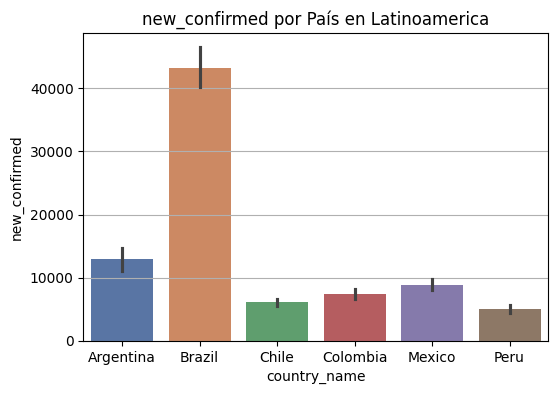

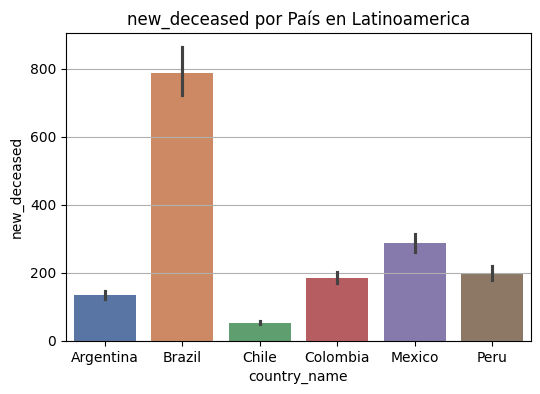

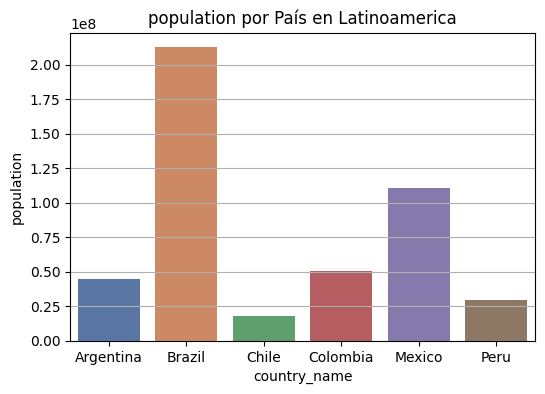

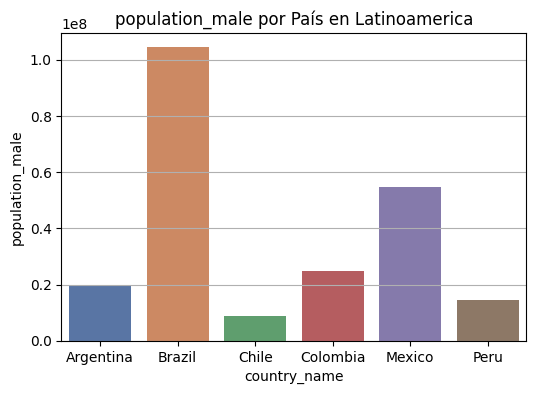

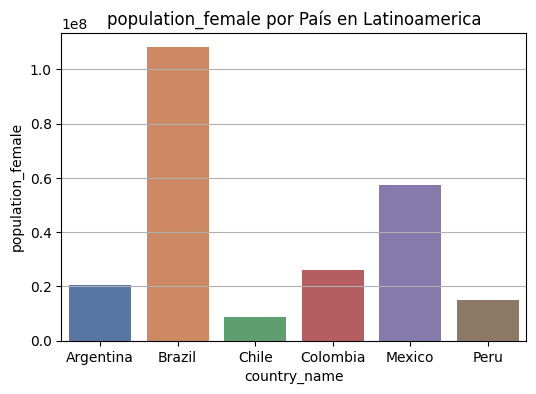

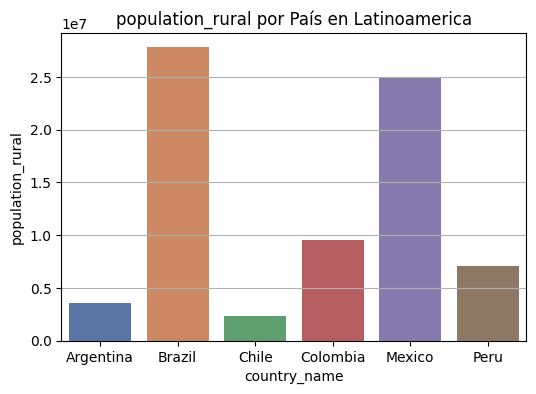

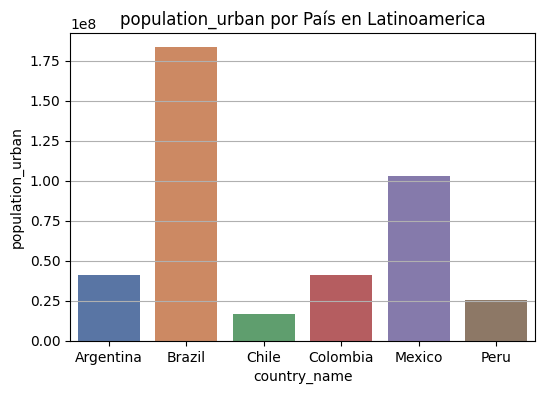

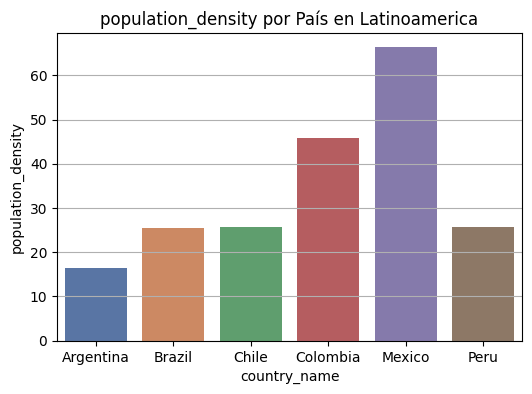

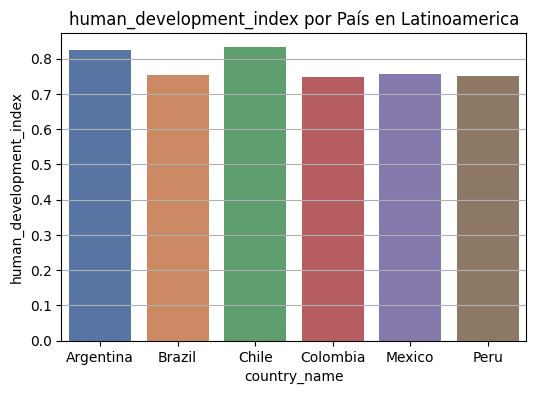

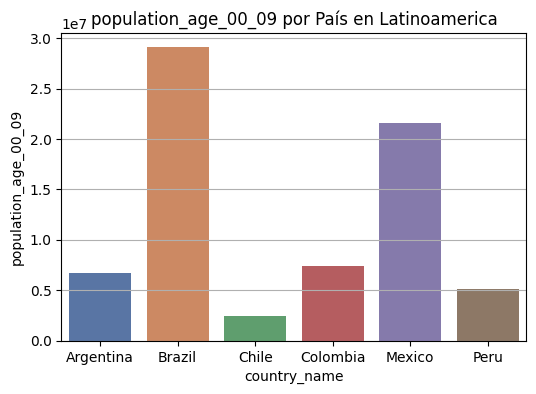

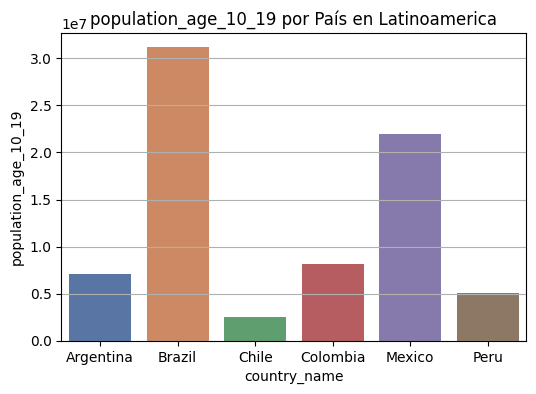

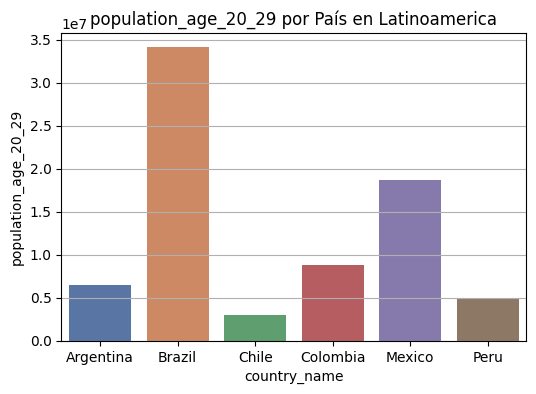

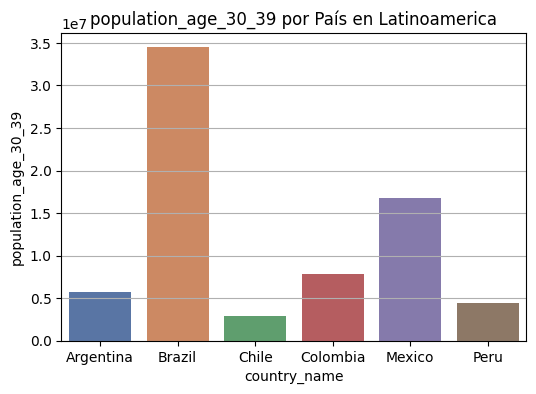

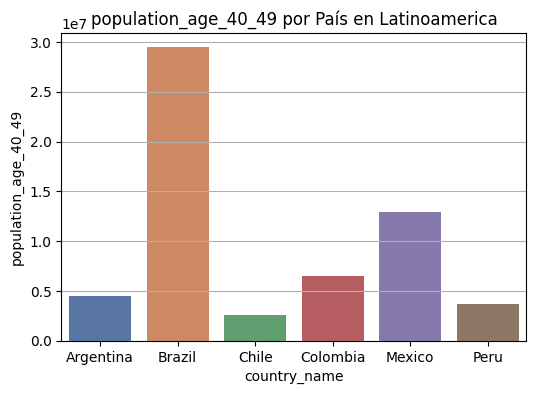

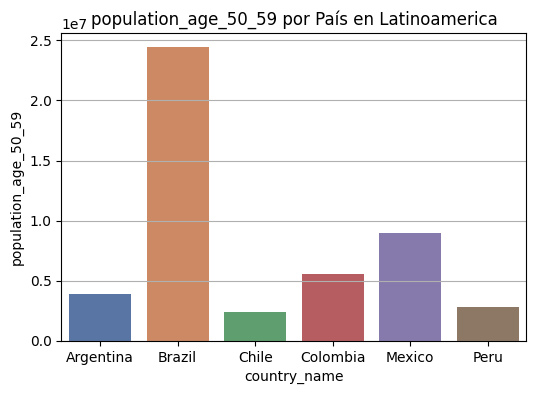

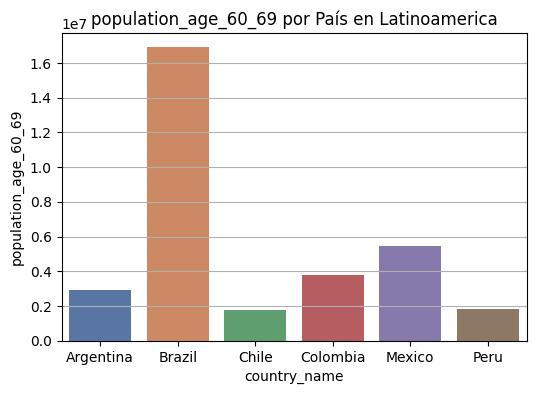

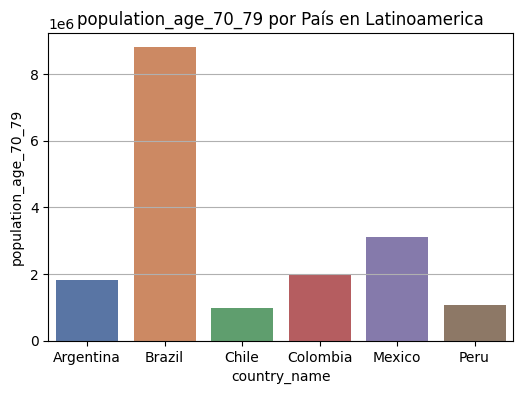

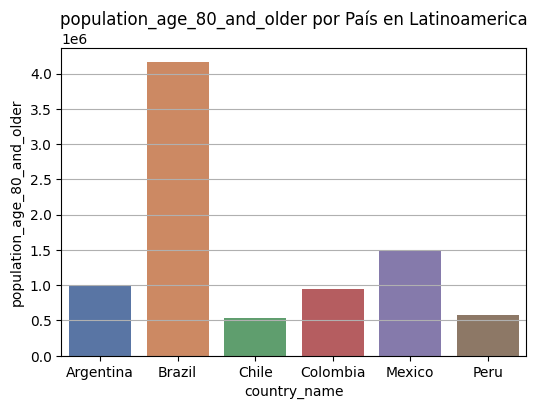

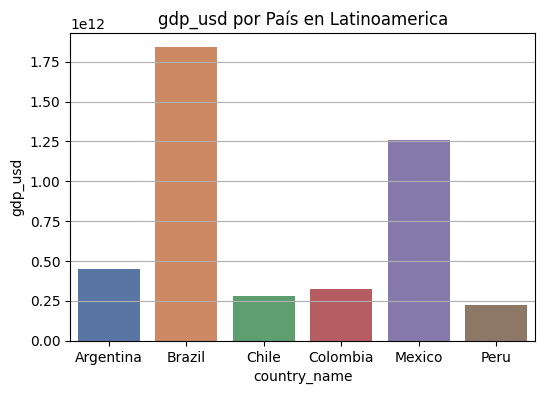

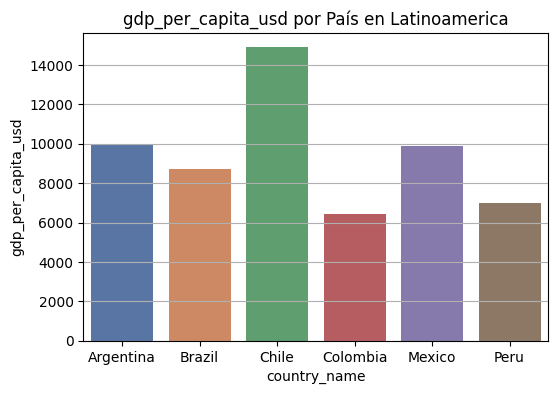

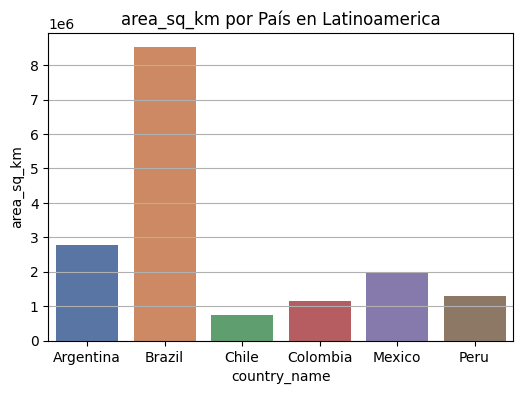

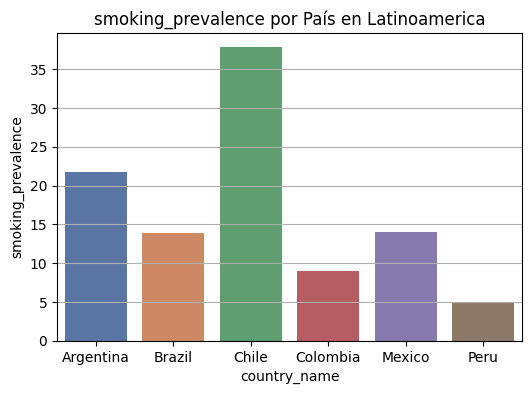

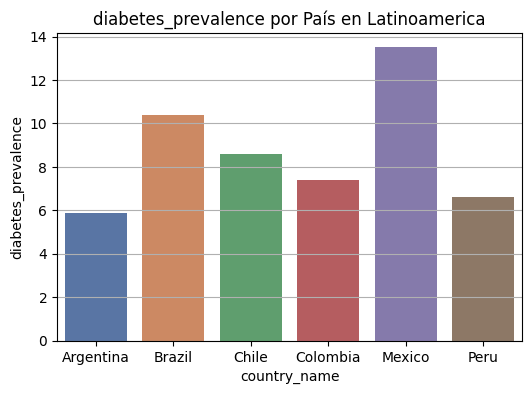

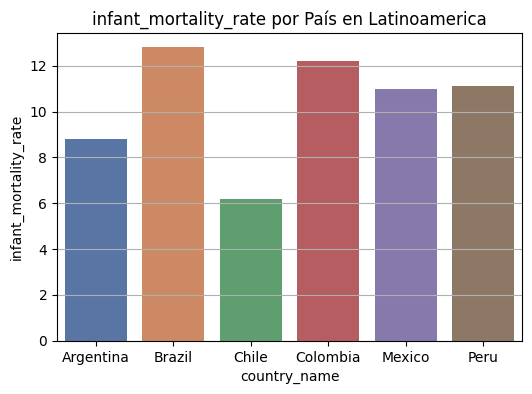

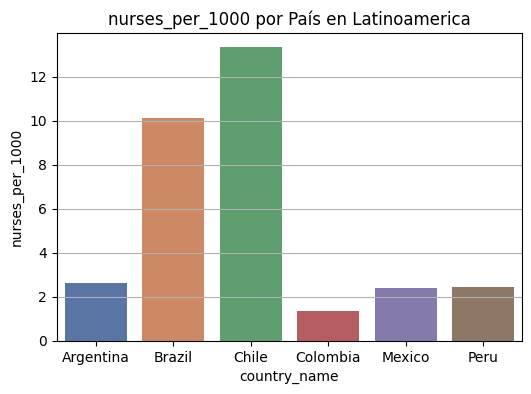

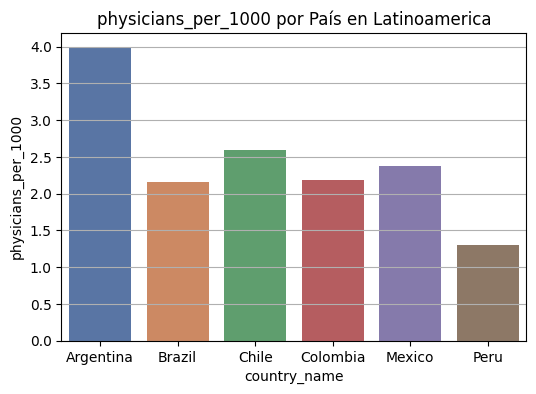

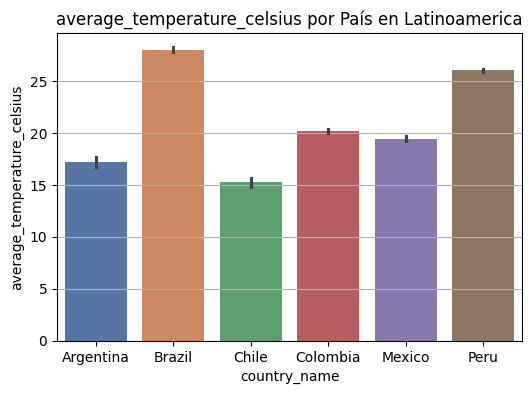

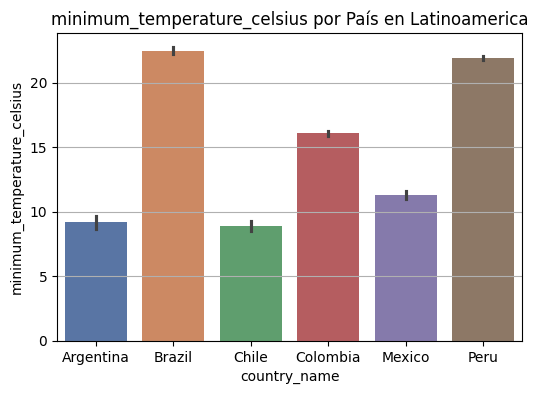

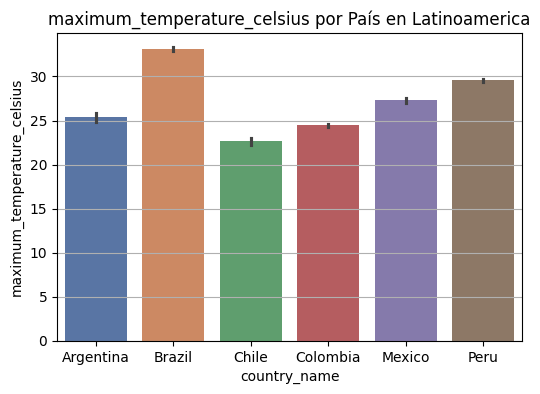

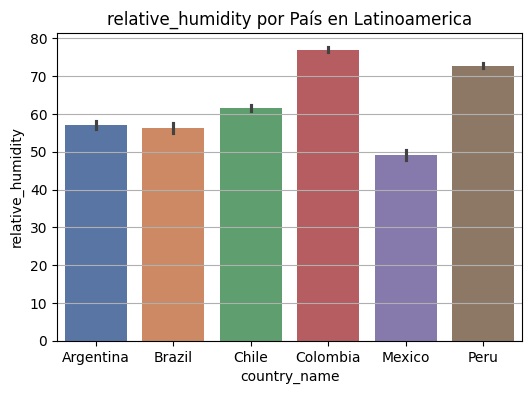

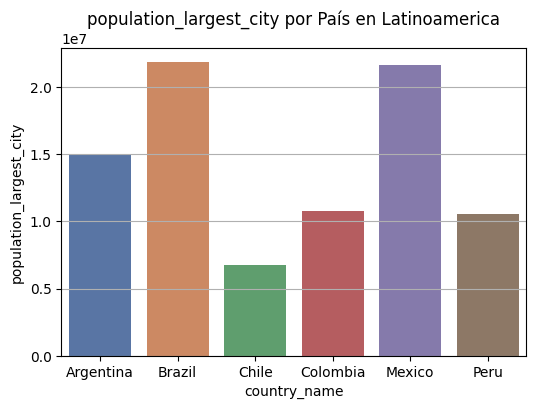

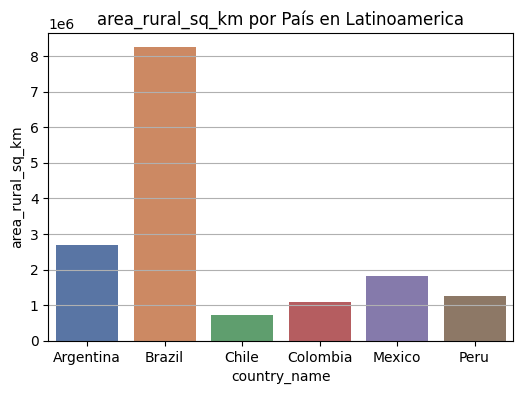

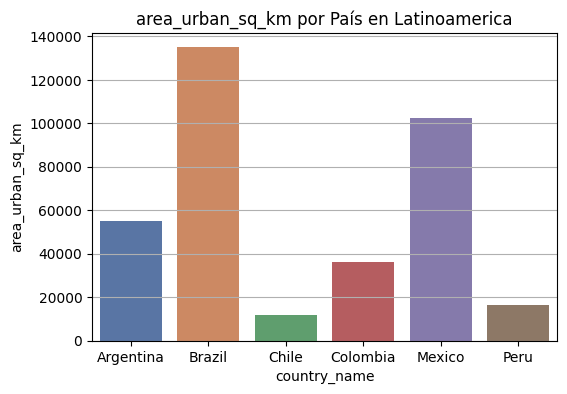

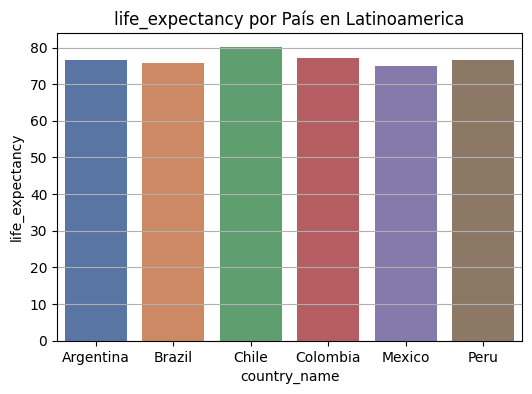

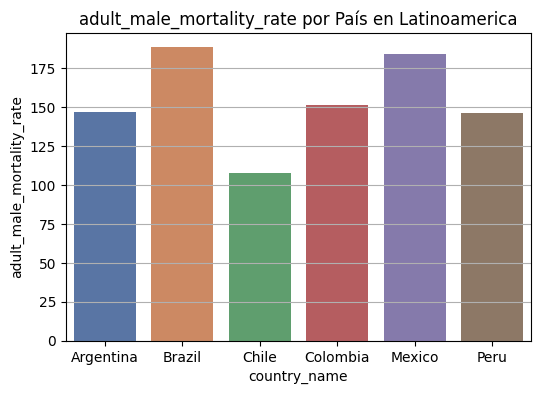

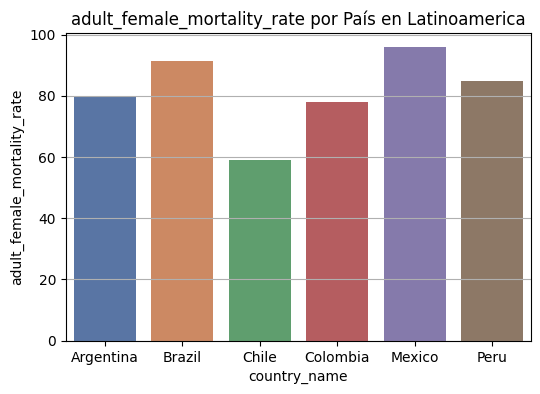

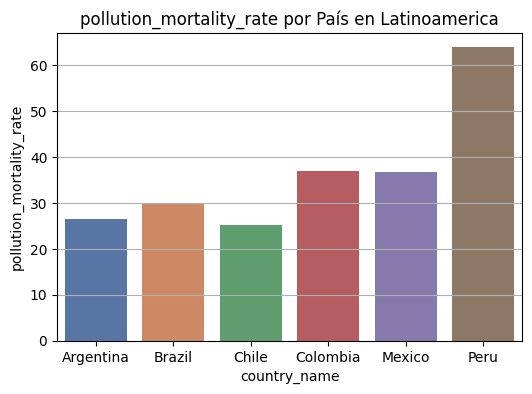

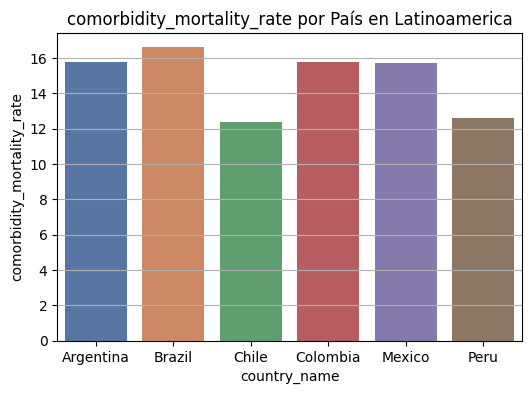

In [20]:
# Diagrama de barras para cada país en data_latinoamerica_nuevo con 6 columnas

# Iteramos sobre cada columna en el DataFrame data_latinoamerica_nuevo

for i in data_latinoamerica_nuevo.columns:
    palette = sns.color_palette()   
    # Excluimos ciertas columnas que no me parecian relevante para graficar

    if i not in ['location_key', 'date', 'country_code', 'country_name', 'latitude', 'longitude', 
                'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 
                'cumulative_vaccine_doses_administered', 'new_recovered']:
        
        # Configuramos la figura y los ejes para el gráfico de barras
        fig, ax = plt.subplots(figsize=(6, 4))
        
        # Creamos un gráfico de barras (barplot) utilizando seaborn
        sns.barplot(x='country_name', y=i, data=data_latinoamerica_nuevo, ax=ax, hue='country_name', palette='deep')
                
        plt.title(f'{i} por País en Latinoamerica')                 # Añadimos un título al gráfico
        plt.grid(axis='y')                                          # Agregar lineas solo en el eje y
        
        plt.show()                                                  # Mostramos el gráfico

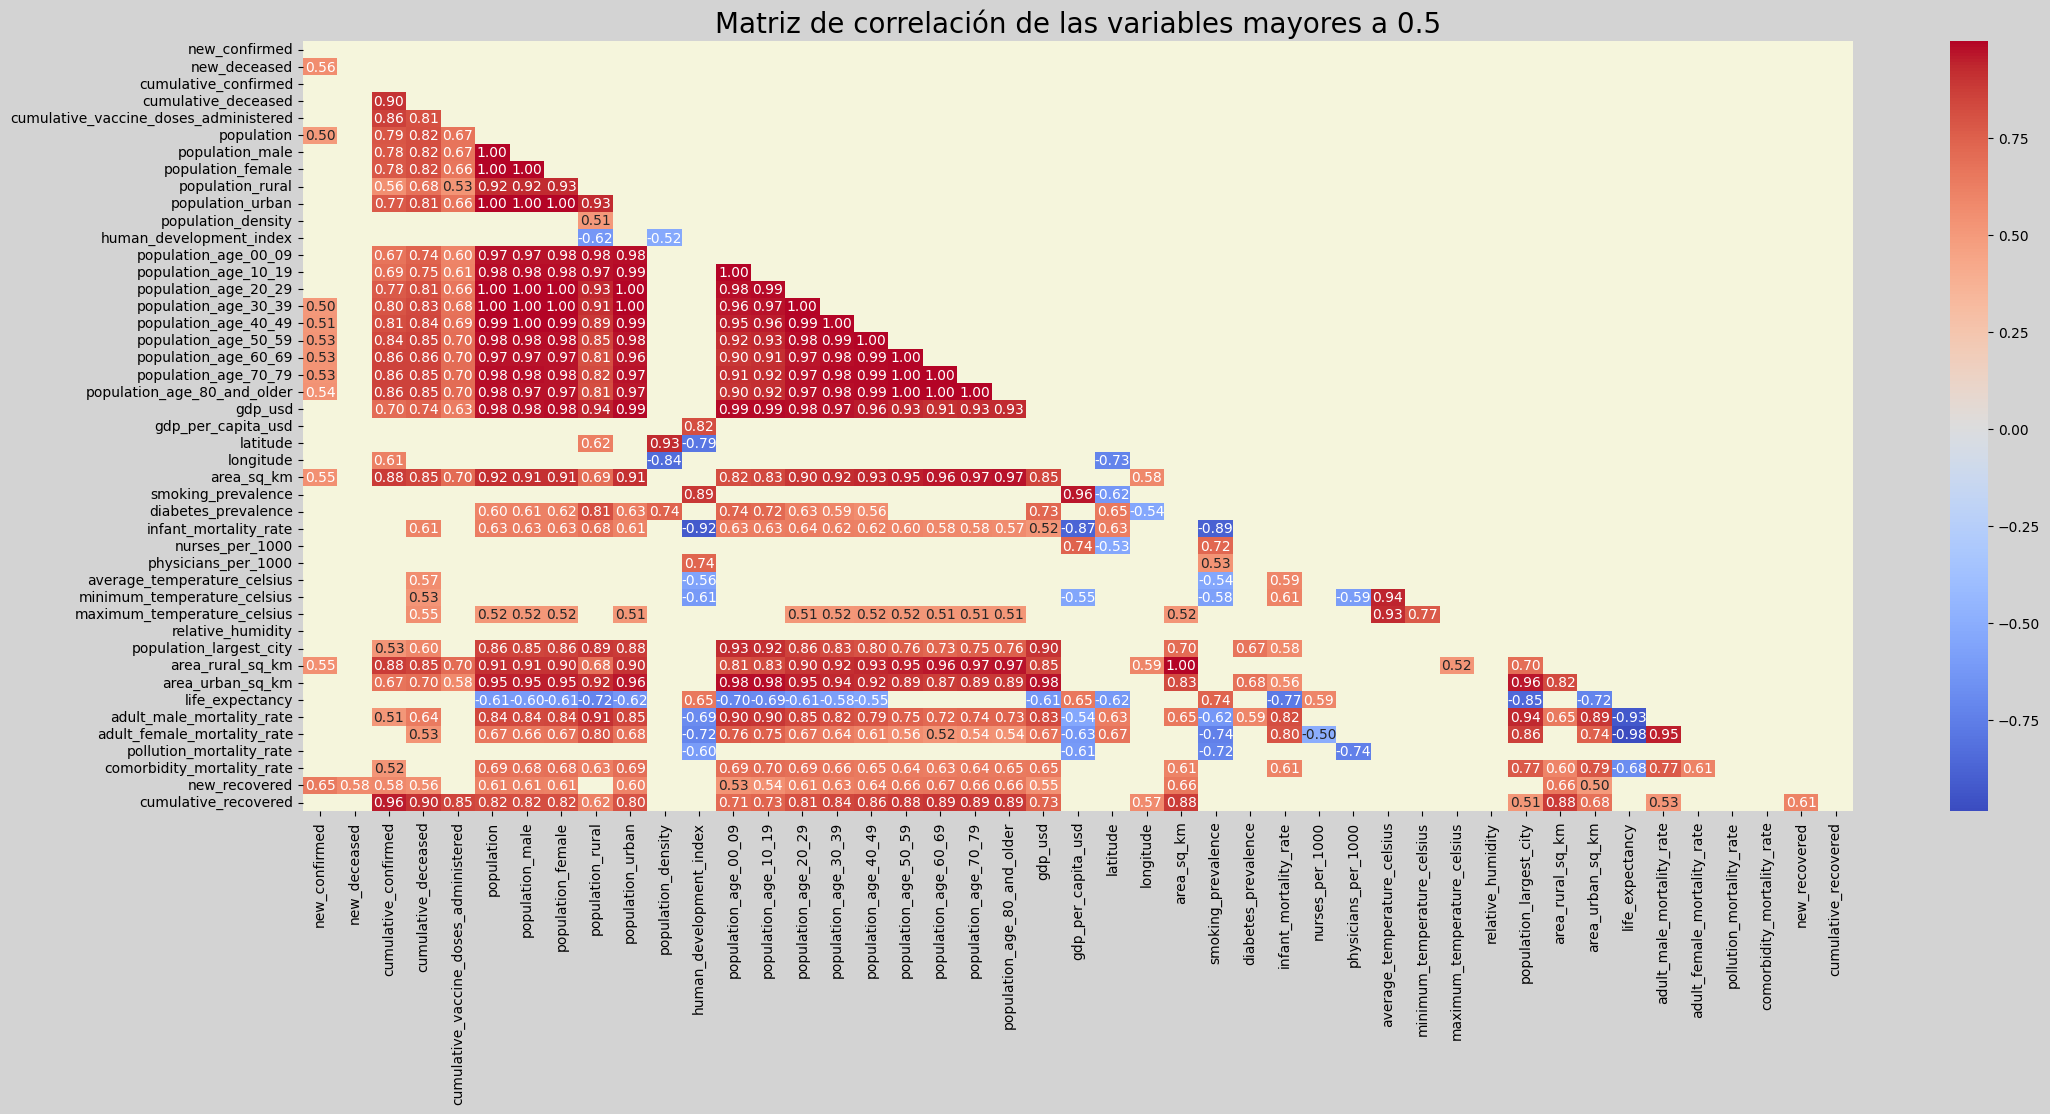

In [21]:
#Se crea la matriz de correlación de las variables numéricas
numeric_columns = data_latinoamerica_nuevo.select_dtypes(include=['float64','int64']).columns
correlation_matrix = data_latinoamerica_nuevo[numeric_columns].corr()

#Aqui se crea máscara para el triángulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Vamos a mostrar valores superiores a 0.5 es decur donde hay una correlación fuerte sin embargo tambien se puede mostrar valores negativos.
correlation_matrix = correlation_matrix[abs(correlation_matrix) > abs(0.5)]

# Se crea la gráfica
plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.gca().set_facecolor('beige')  # Color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')  # Establece el fondo alrededor del gráfico a negro
plt.title('Matriz de correlación de las variables mayores a 0.5', fontsize=20)
plt.show()

##### **3-** Histogramas de las variables que “Sí” tenga cambios de valores.

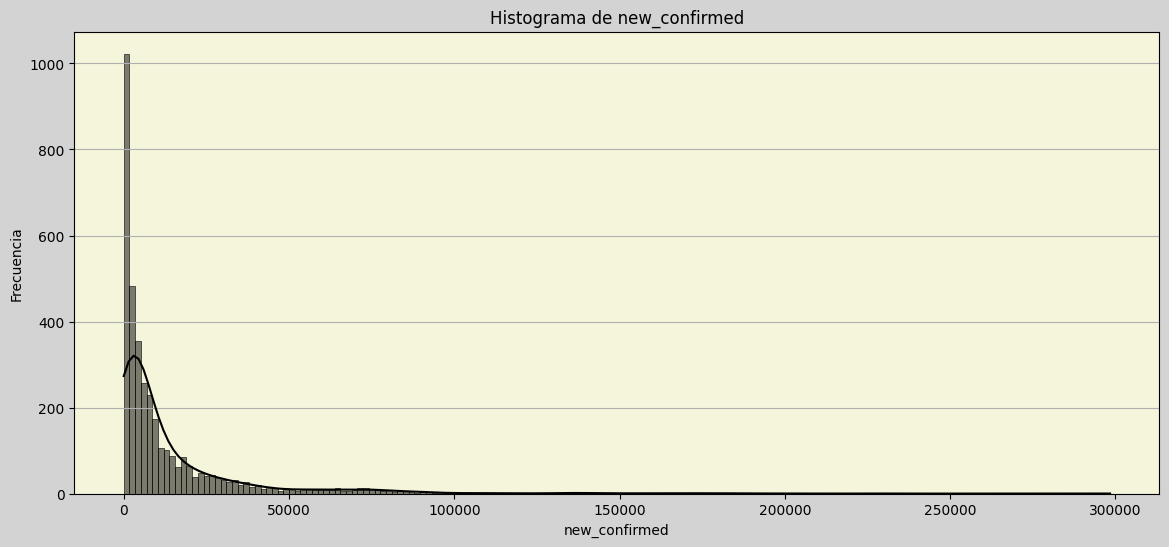

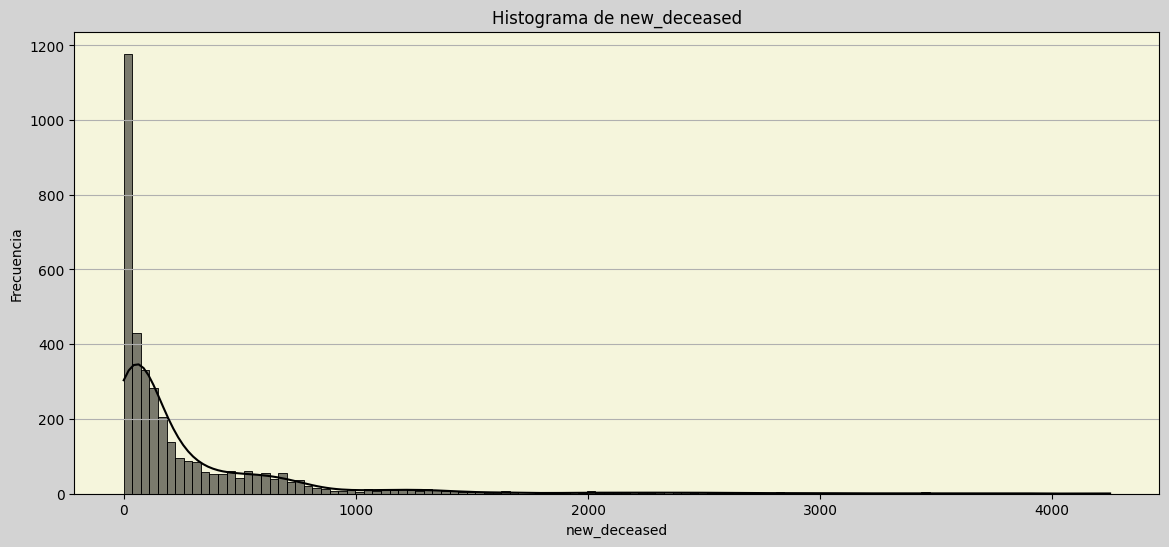

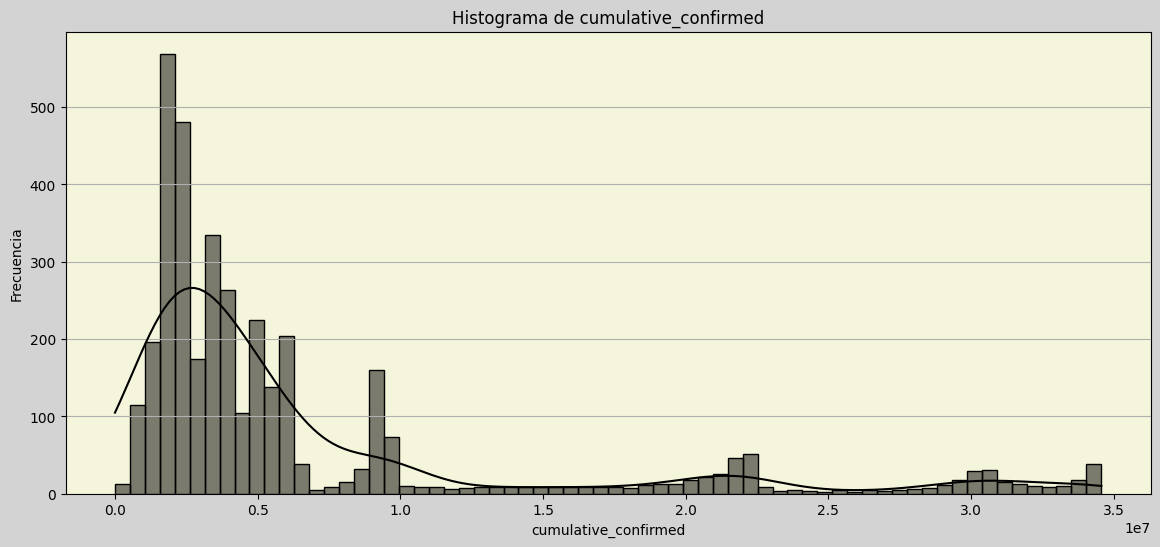

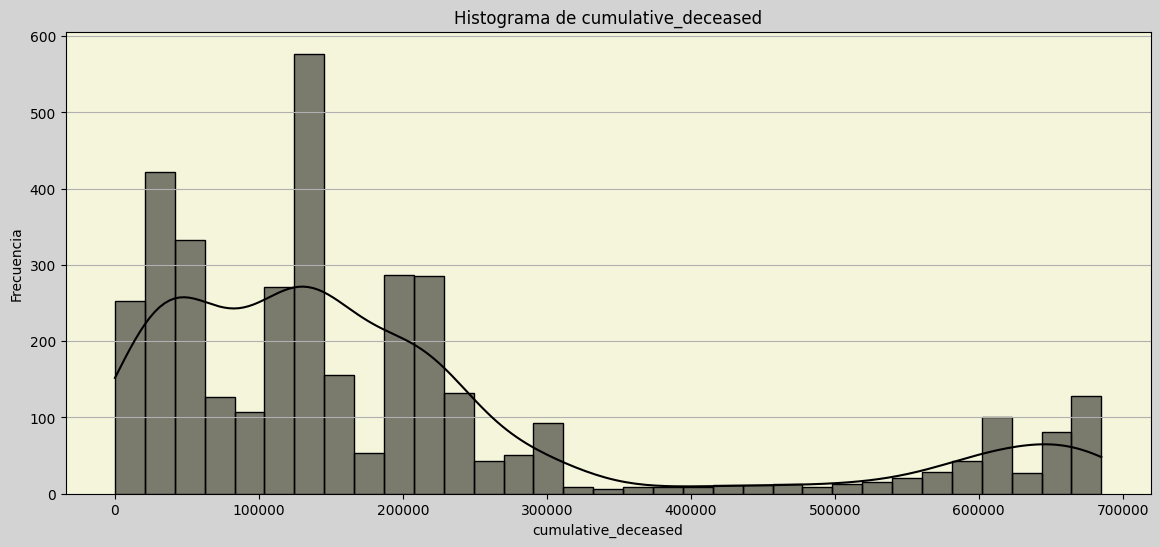

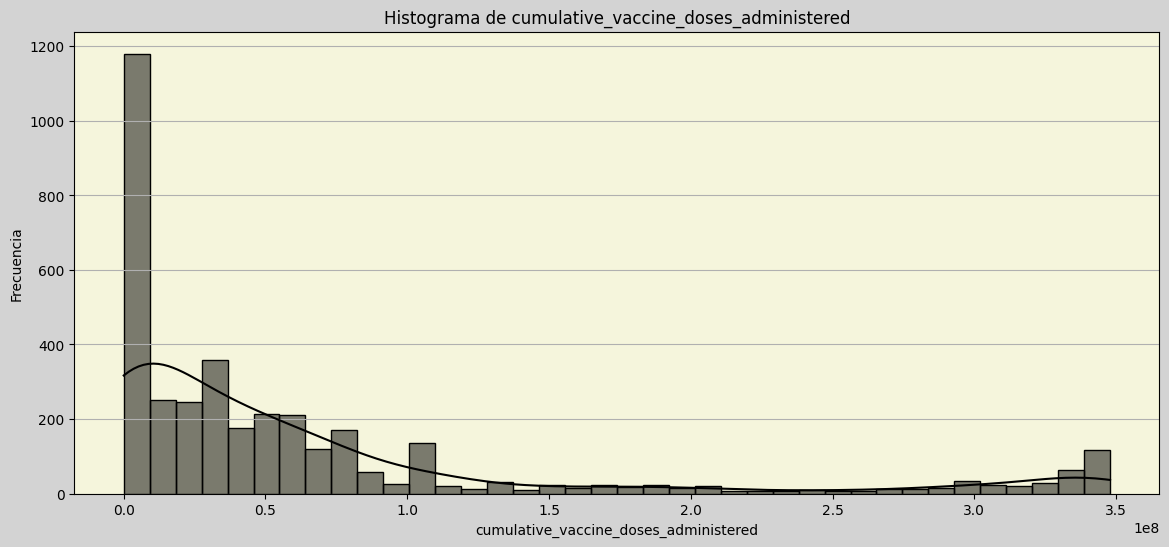

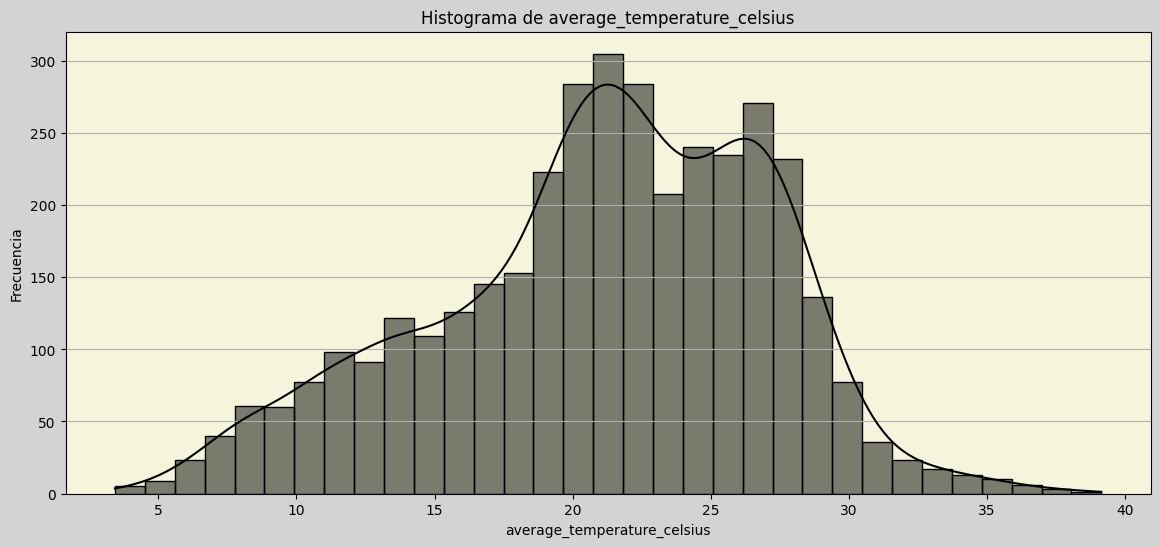

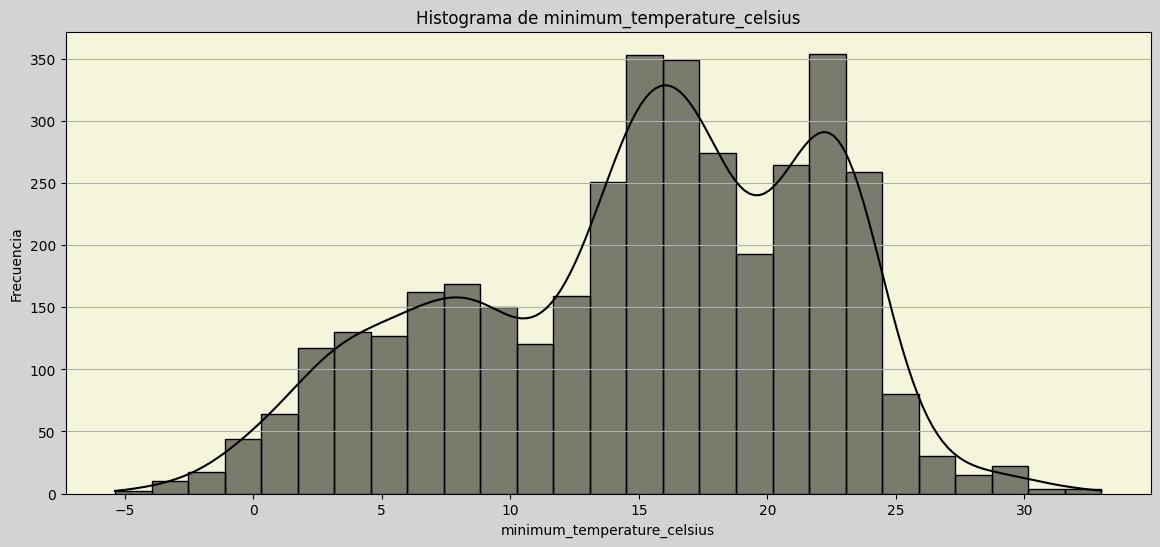

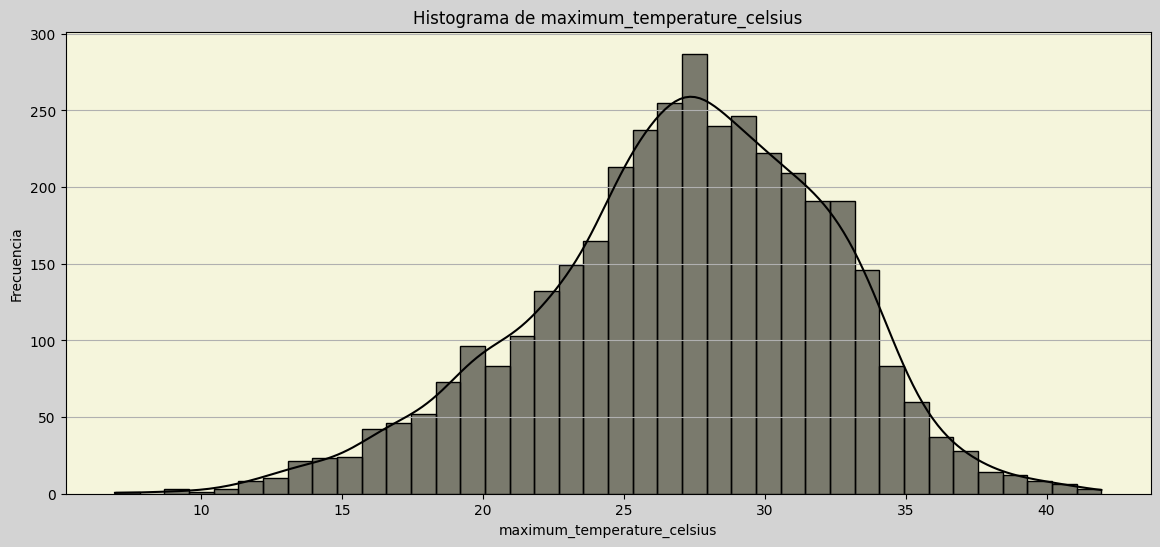

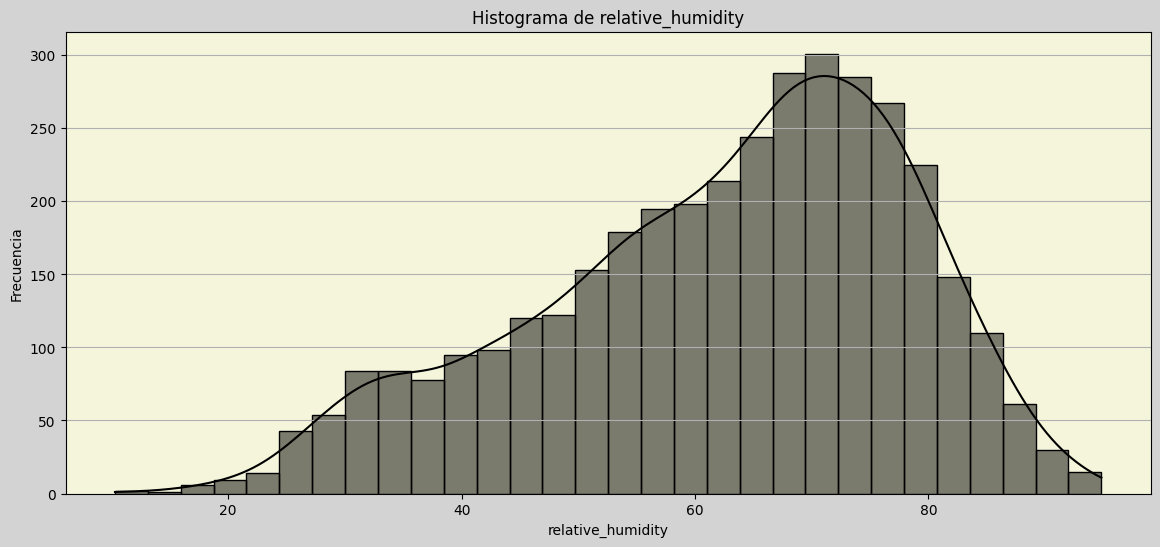

In [22]:
# Crear una variable, que contenga las columnas que tengan variables con cambios de valores

variables_con_cambios = ['new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'average_temperature_celsius', 'minimum_temperature_celsius', 'maximum_temperature_celsius', 'relative_humidity']


for columna in variables_con_cambios:                                   # el ciclo for itera sobre cada columna
    fig, ax = plt.subplots(figsize=(14, 6))                              # crear figura y ejes
    sns.histplot(data_latinoamerica_nuevo[columna], kde=True, color='black')           # crear un histograma con cada una de las columnas, y añadir una estimación de densidad kernel: (curva suave que representa la distribución de los datos)
    plt.gca().set_facecolor('beige')  # Color de fondo del área del gráfico
    plt.gcf().set_facecolor('lightgray')  # Establece el fondo alrededor del gráfico a negro
    
    plt.title(f'Histograma de {columna}')                               # selecciona que el titulo del grafico sera el nombre de cada columna
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.grid(axis='y')  # Agregar lineas solo en el eje y
    
    plt.show()                                                          # imprimir el grafico

##### **4-** Diagrama de dispersión de la temperatura media contra los casos confirmados.

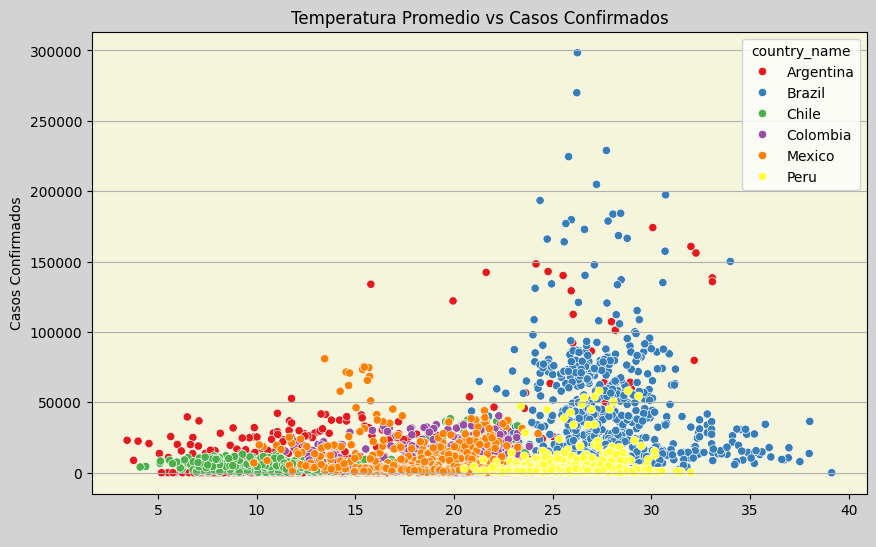

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))                             #crear la figura y los ejes
sns.scatterplot(x='average_temperature_celsius', y='new_confirmed', data=data_latinoamerica_nuevo, hue='country_name', palette='Set1') #crear grafico de dispersion
plt.gca().set_facecolor('beige')  # Color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')  # Establece el fondo alrededor del gráfico a negro

plt.title('Temperatura Promedio vs Casos Confirmados')           # selecciona que el titulo del grafico sera el nombre de cada columna
plt.xlabel('Temperatura Promedio')                                      #titulo eje x
plt.ylabel('Casos Confirmados')     
plt.grid(axis='y')  # Agregar lineas solo en el eje y
plt.show()                                                          # imprimir el grafico

##### **5-** Diagrama de dispersión de la temperatura media contra las muertes confirmadas.

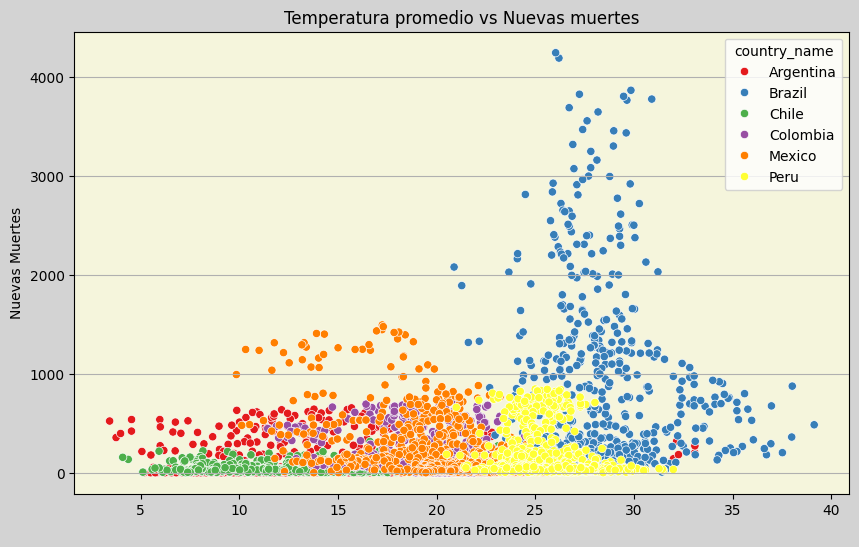

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))                                 #crear la figura y los ejes
sns.scatterplot(x='average_temperature_celsius', y='new_deceased', data=data_latinoamerica_nuevo, hue='country_name', palette='Set1') #crear grafico de dispersion

plt.gca().set_facecolor('beige')  # Color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')  # Establece el fondo alrededor del gráfico a negro

plt.title('Temperatura promedio vs Nuevas muertes')                     # selecciona que el titulo del grafico sera el nombre de cada columna
plt.xlabel('Temperatura Promedio')                                      #titulo eje x
plt.ylabel('Nuevas Muertes')                                                 #titulo eje y
plt.grid(axis='y')  # Agregar lineas solo en el eje y

plt.show()                                                              # imprimir el grafico

##### **6-** Comportamiento de las dosis administradas de todos los países (Valor medio).

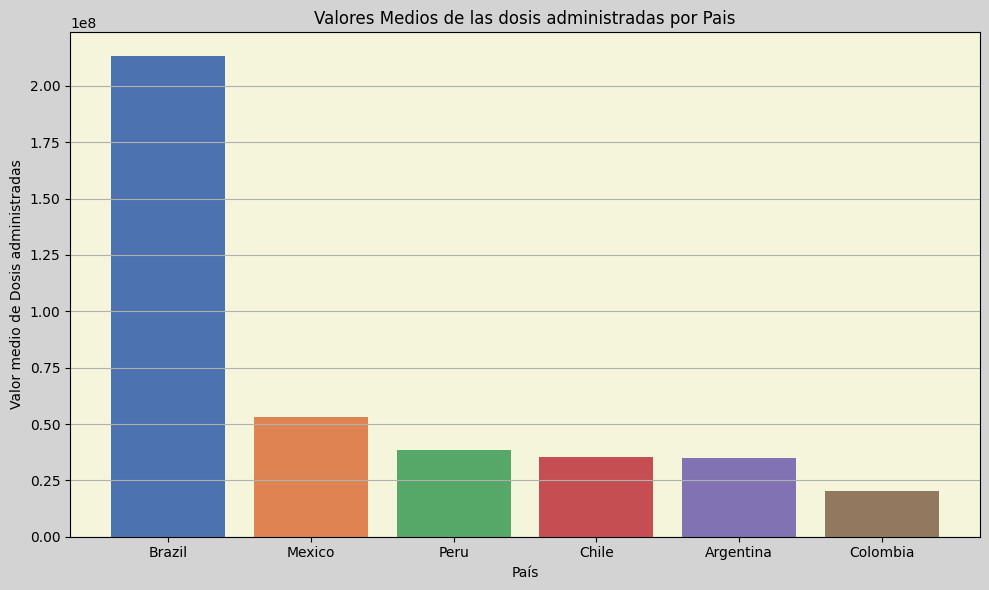

In [25]:
# Calcular el valor medio de las dosis administradas por país
# Agrupa los datos por el nombre del país y calcula la media de las dosis de vacunas administradas acumuladas.
dosis_media = data_latinoamerica_nuevo.groupby('country_name')['cumulative_vaccine_doses_administered'].mean().sort_values(ascending=False)

# Definir una paleta de colores con Seaborn
palette = sns.color_palette('deep', len(dosis_media))

# Crear una figura y un eje para el gráfico con un tamaño específico
fig, ax = plt.subplots(figsize=(10, 6))

# Crear un gráfico de barras para mostrar el valor medio de las dosis administradas por país

bars = plt.bar(dosis_media.index, dosis_media.values, color=palette)

plt.title('Valores Medios de las dosis administradas por Pais')    # Añadir un título al gráfico
plt.xlabel('País')  # Etiquetar el eje X
plt.ylabel('Valor medio de Dosis administradas')   # Etiquetar el eje Y

plt.gca().set_facecolor('beige')  # Color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')  # Establece el fondo alrededor del gráfico
plt.grid(axis='y')  # Agregar lineas solo en el eje y
plt.tight_layout()
plt.show()


##### **7-** Evolución de dosis administradas por mes de cada país

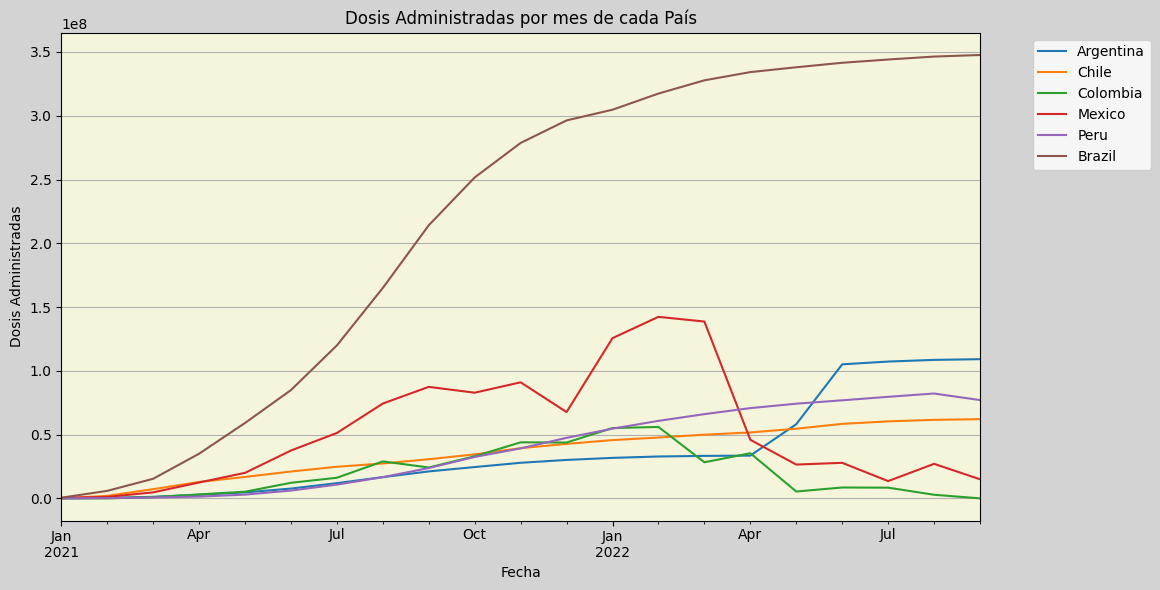

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_filtrados:
    data_latinoamerica_nuevo[data_latinoamerica_nuevo['country_name'] == pais].resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()

plt.title('Dosis Administradas por mes de cada País')
plt.xlabel('Fecha') # titulo eje x
plt.ylabel('Dosis Administradas') # titulo eje y


plt.gca().set_facecolor('beige')  # Color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')  # Establece el fondo alrededor del gráfico
plt.grid(axis='y')  # Agregar lineas solo en el eje y
plt.tight_layout()

plt.legend(paises_filtrados, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### **8-** Muertes por mes de cada país.

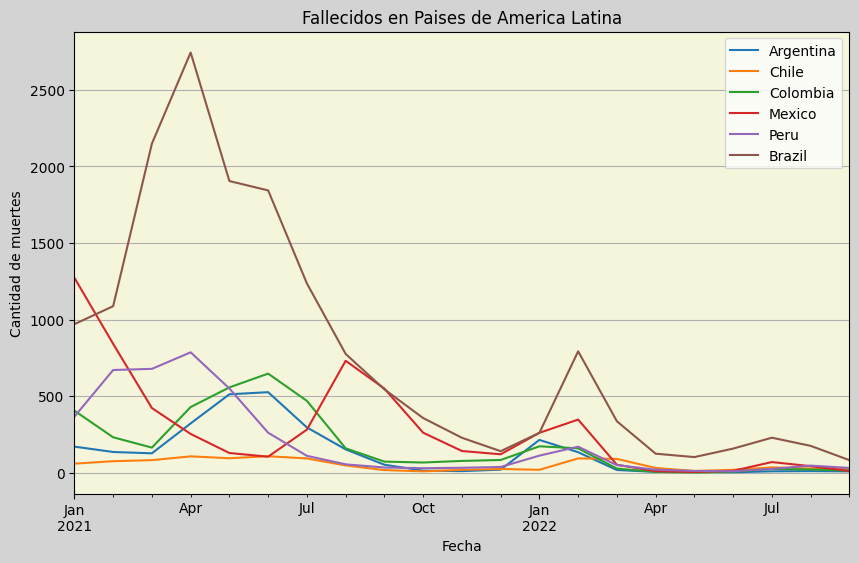

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))


for pais in paises_filtrados:
     data_latinoamerica_nuevo[data_latinoamerica_nuevo['country_name'] == pais].resample('ME').mean(numeric_only=True)['new_deceased'].plot(ax=ax, label=pais)

plt.gca().set_facecolor('beige')  # Color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')  # Establece el fondo alrededor del gráfico a negro

plt. title('Fallecidos en Paises de America Latina')

plt.xlabel('Fecha')
plt.ylabel('Cantidad de muertes')
plt.grid(axis='y')  # Agregar lineas solo en el eje y

plt. legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt. legend(paises_filtrados)
plt. show()

##### **9-** Casos confirmados por mes de cada país.

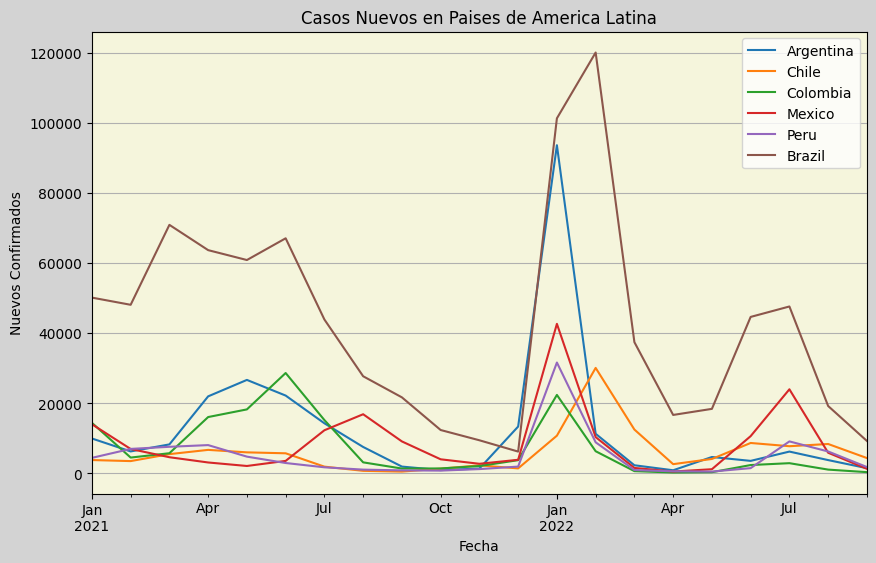

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_filtrados:
    data_latinoamerica_nuevo[data_latinoamerica_nuevo['country_name'] == pais].resample('ME').mean(numeric_only=True)['new_confirmed'].plot(ax=ax, label=pais)

plt.gca().set_facecolor('beige')  # Color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')  # Establece el fondo alrededor del gráfico a negro

plt. title('Casos Nuevos en Paises de America Latina')

plt.xlabel('Fecha')
plt.ylabel('Nuevos Confirmados')
plt.grid(axis='y')  # Agregar lineas solo en el eje y

plt. legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt. legend(paises_filtrados)
plt. show()

##### **10-** Recuperaciones de casos por mes de cada país.

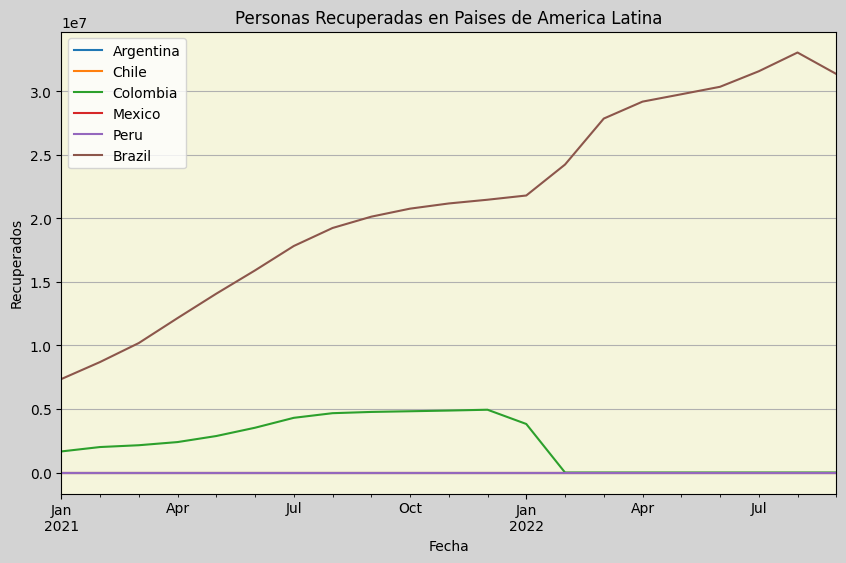

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_filtrados:
    data_latinoamerica_nuevo[data_latinoamerica_nuevo['country_name'] == pais].resample('ME').mean(numeric_only=True)['cumulative_recovered'].plot(ax=ax, label=pais)

plt.gca().set_facecolor('beige')  # Color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')  # Establece el fondo alrededor del gráfico a negro

plt. title('Personas Recuperadas en Paises de America Latina')

plt.xlabel('Fecha')
plt.ylabel('Recuperados')
plt.grid(axis='y')  # Agregar lineas solo en el eje y

plt. legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt. legend(paises_filtrados)
plt. show()

##### **11-** Comparación del Número de Casos Nuevos entre Países.

C:\Users\floor\AppData\Local\Temp\ipykernel_8288\2255469785.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=casos_nuevos_pais.index, y=casos_nuevos_pais.values, palette='deep')


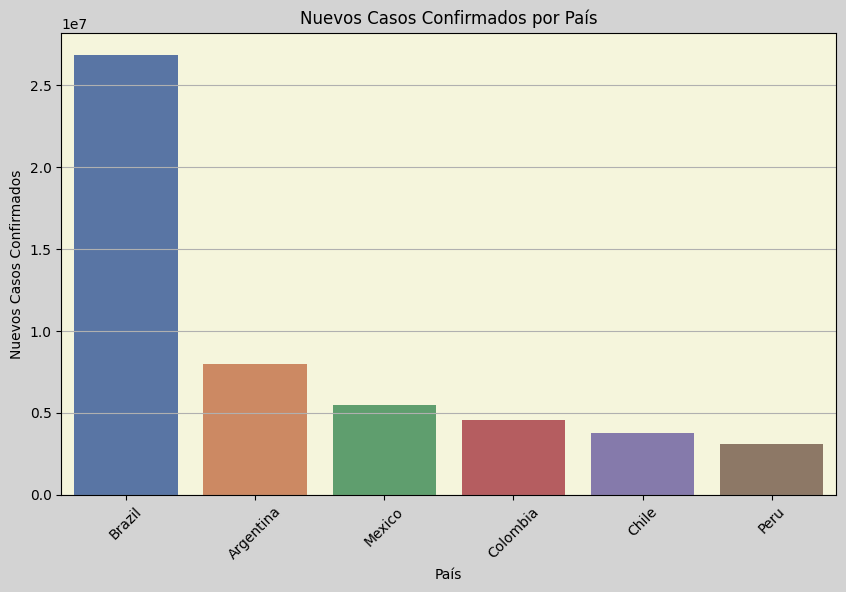

In [32]:
# Seleccionar una muestra de datos para el gráfico de barras
casos_nuevos_pais = data_latinoamerica_nuevo.groupby('country_name')['new_confirmed'].sum().sort_values(ascending=False)

# Definir una paleta de colores con Seaborn
palette = sns.color_palette('deep', len(casos_nuevos_pais))

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))

plt.gca().set_facecolor('beige')  # Color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')  # Establece el fondo alrededor del gráfico a negro

sns.barplot(x=casos_nuevos_pais.index, y=casos_nuevos_pais.values, palette='deep')
plt.title('Nuevos Casos Confirmados por País')
plt.xlabel('País')
plt.ylabel('Nuevos Casos Confirmados')
plt.xticks(rotation=45)
plt.grid(axis='y')  # Agregar lineas solo en el eje y
plt.show()


##### **12-** Dosis acumuladas por país.

C:\Users\floor\AppData\Local\Temp\ipykernel_8288\2644308216.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dosis_acumuladas_por_pais.index, y=dosis_acumuladas_por_pais.values, palette='deep')


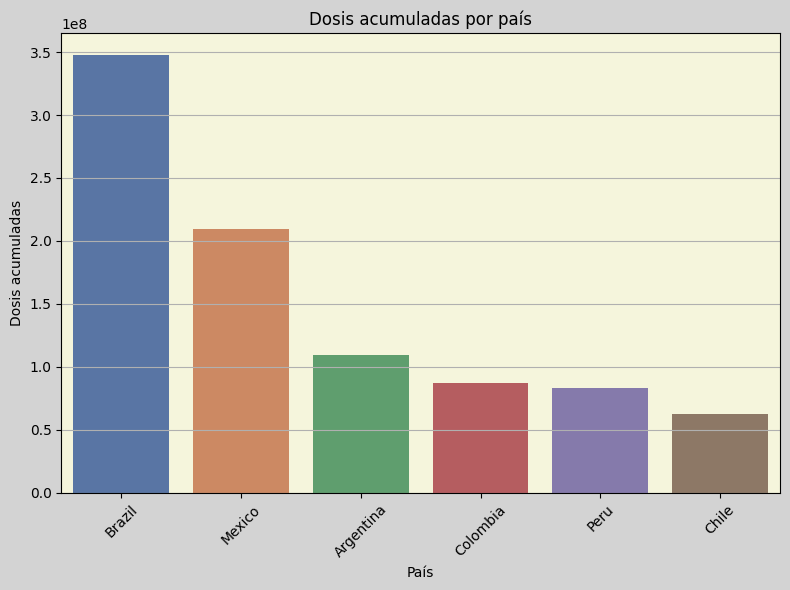

In [33]:
# Agrupar los datos por país y sumar las dosis acumuladas
dosis_acumuladas_por_pais = data_latinoamerica_nuevo.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)

# Definir una paleta de colores con Seaborn
palette = sns.color_palette('deep', len(dosis_acumuladas_por_pais))

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=dosis_acumuladas_por_pais.index, y=dosis_acumuladas_por_pais.values, palette='deep')


plt.gca().set_facecolor('beige')  # Color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')  # Establece el fondo alrededor del gráfico a negro 


plt.title('Dosis acumuladas por país')
plt.xlabel('País')
plt.ylabel('Dosis acumuladas')
plt.xticks(rotation=45)
plt.grid(axis='y')  # Agregar rejilla solo en el eje y
plt.tight_layout()
plt.show()

##### **13-** Boxplot de temperatura media de cada país.

C:\Users\floor\AppData\Local\Temp\ipykernel_8288\2646744842.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='country_name', y='average_temperature_celsius', data=data_latinoamerica_nuevo, order=orden_paises, palette=palette)
C:\Users\floor\AppData\Local\Temp\ipykernel_8288\2646744842.py:10: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.boxplot(x='country_name', y='average_temperature_celsius', data=data_latinoamerica_nuevo, order=orden_paises, palette=palette)


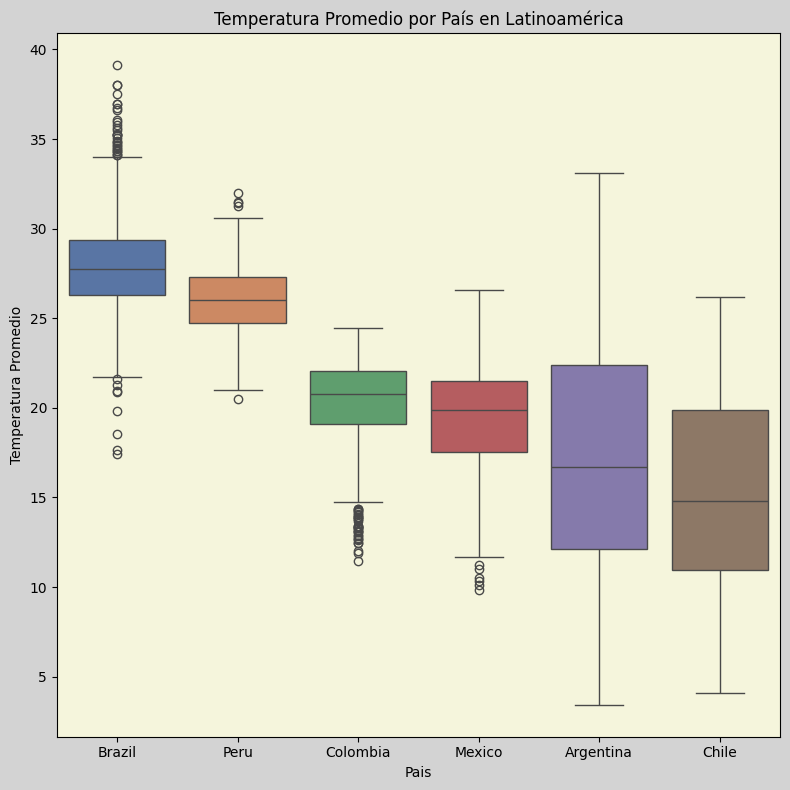

In [34]:
# Calcular la temperatura promedio por país y ordenarlos de mayor a menor
orden_paises = data_latinoamerica_nuevo.groupby('country_name')['average_temperature_celsius'].mean().sort_values(ascending=False).index


plt.figure(figsize=(8, 8))

palette = sns.color_palette('deep')

# Crear el gráfico de caja ordenado por temperatura promedio
sns.boxplot(x='country_name', y='average_temperature_celsius', data=data_latinoamerica_nuevo, order=orden_paises, palette=palette)

plt.gca().set_facecolor('beige')  # Color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')  # Establece el fondo alrededor del gráfico a negro 

plt.title('Temperatura Promedio por País en Latinoamérica')
plt.xlabel('Pais')
plt.ylabel('Temperatura Promedio')
plt.tight_layout()
plt.show()

##### **14-** Violinplot de las variables que “Sí” tenga cambios de valores.

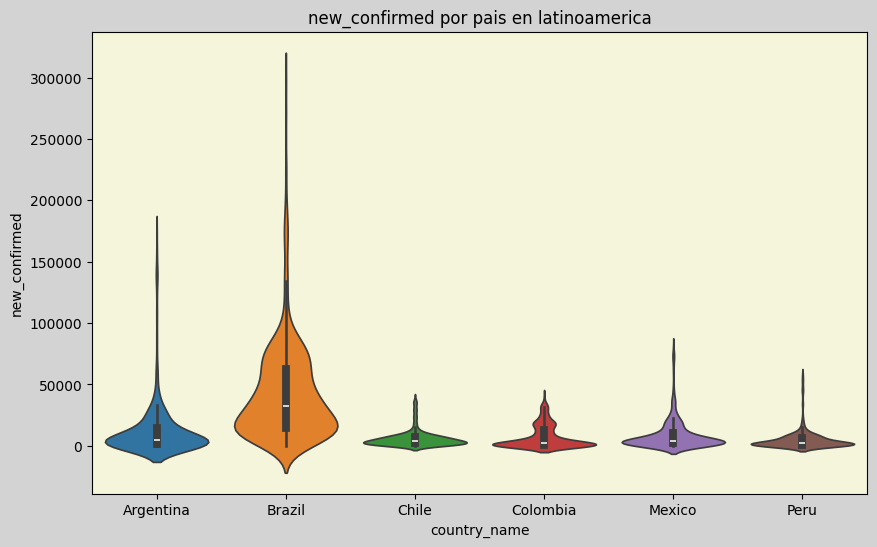

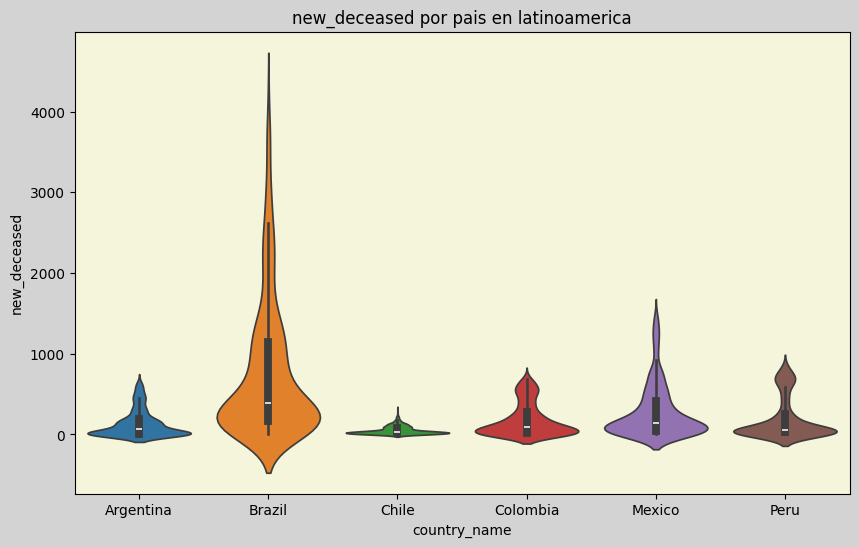

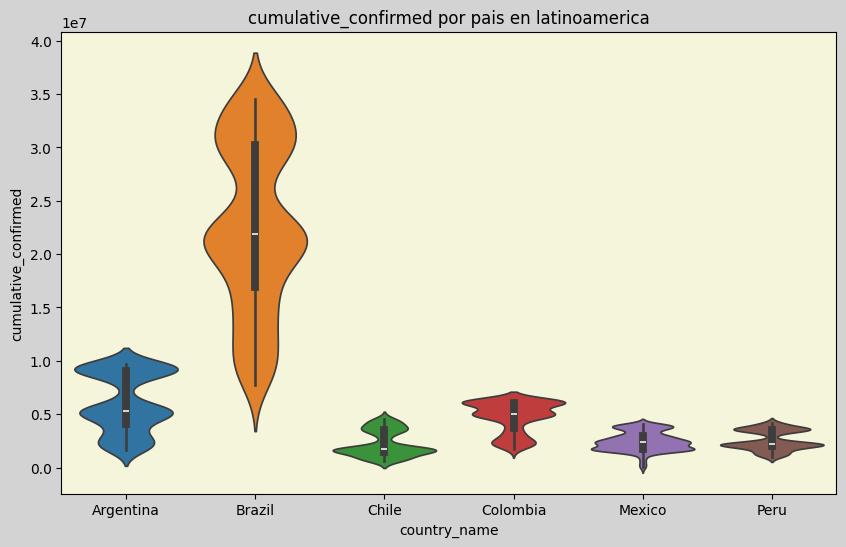

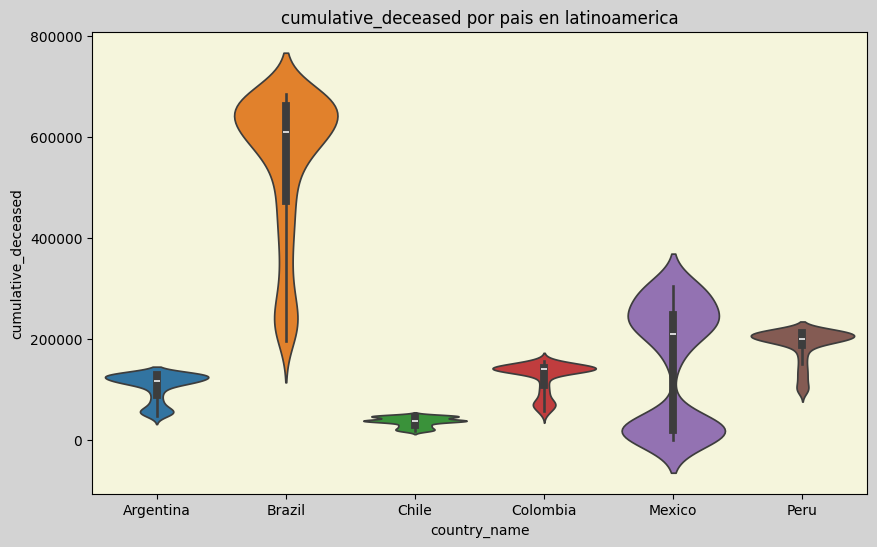

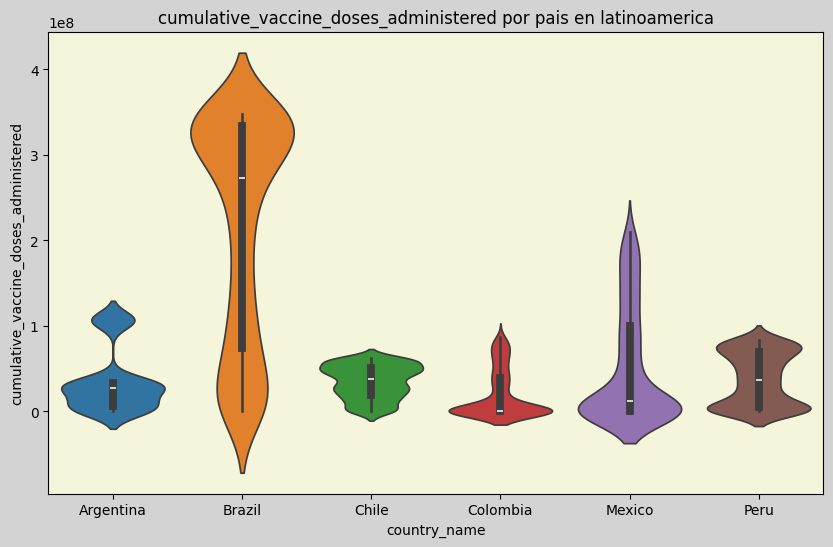

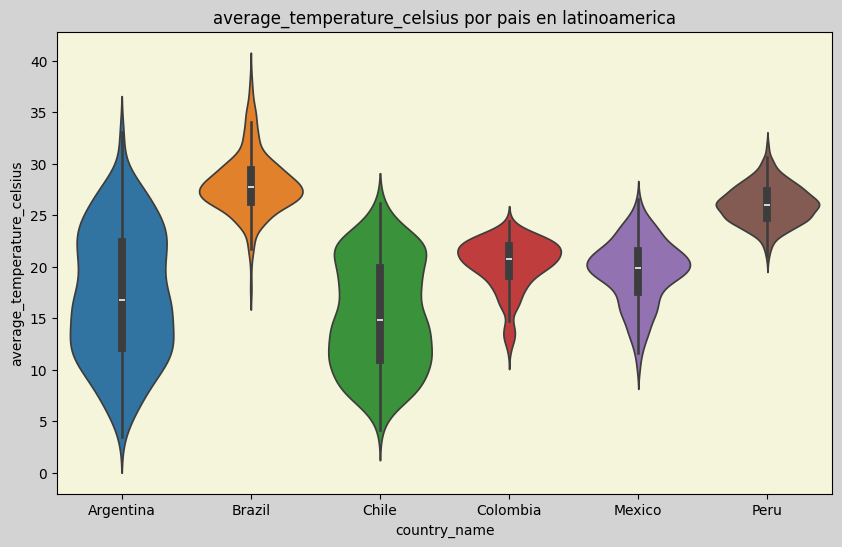

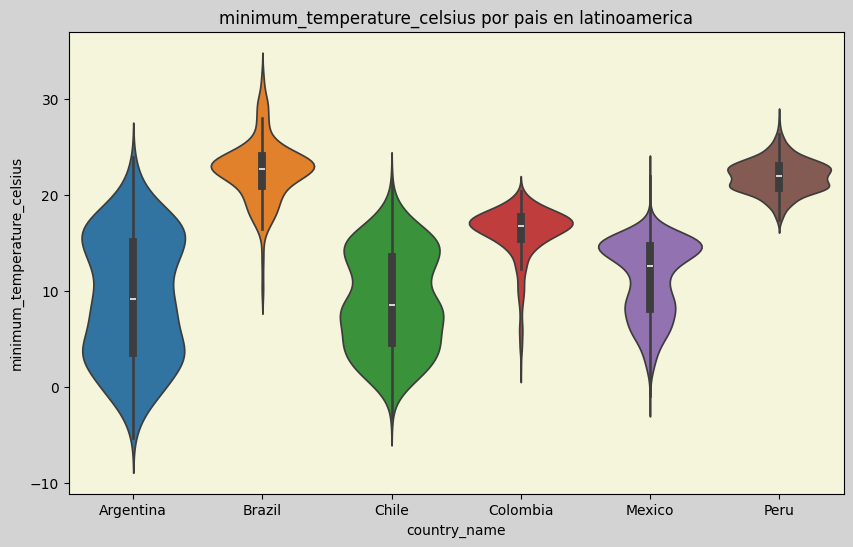

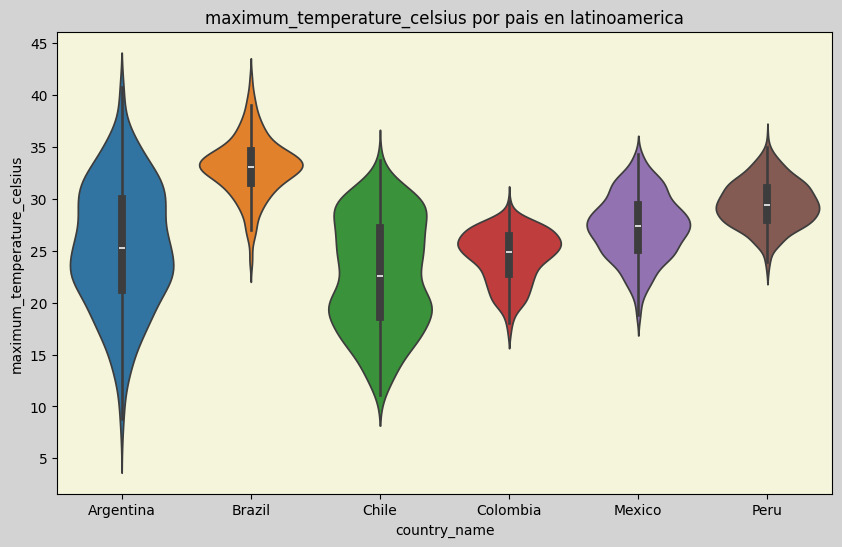

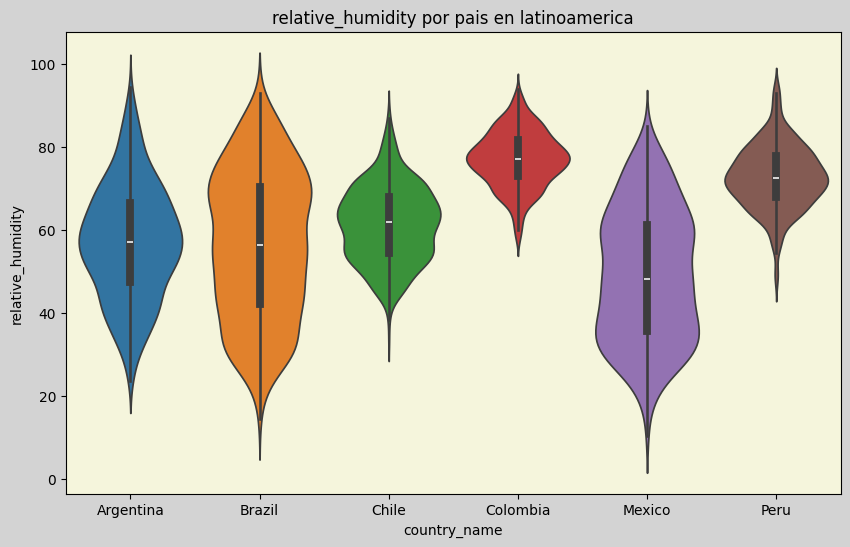

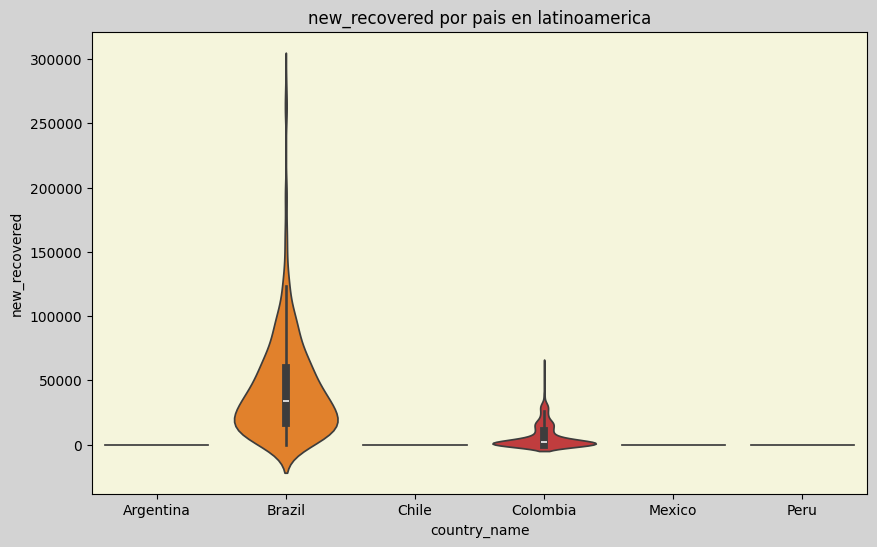

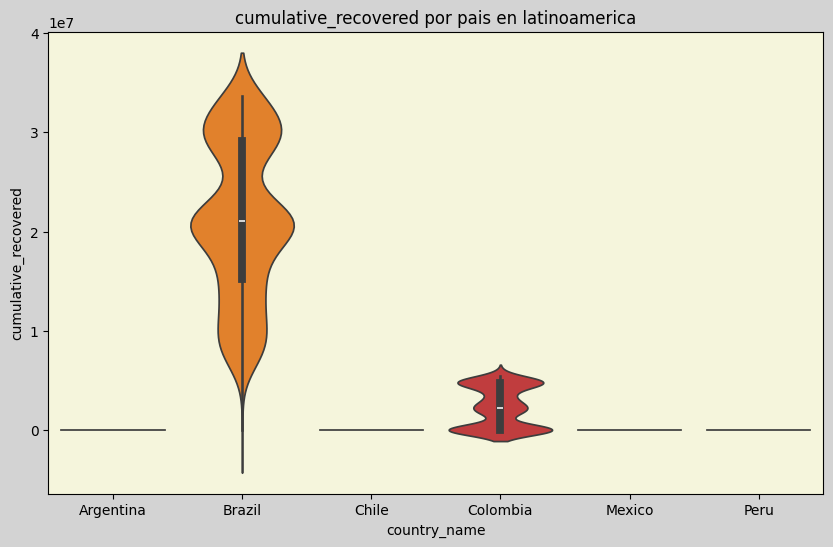

In [35]:
#Se crea un dataframe con las columnas mayores a 6 porque son las que tienen valores diferentes

columnas_mayores_6=[]

for i in data_latinoamerica_nuevo.columns:
    if i not in ['location_key', 'date', 'country_code', 'latitude', 'longitude']:
        if data_latinoamerica_nuevo[i].nunique()>6:
            columnas_mayores_6.append(i)

#agregar a columnas_mayores_6 la columna country_name para poder hacer analisis por-pais.
columnas_mayores_6.append('country_name')
#(variable) data_latinoamerica_nuevo_mayores_6: DataFrame

data_latinoamerica_nuevo_mayores_6=data_latinoamerica_nuevo[columnas_mayores_6]

# violinplot en todos los paises para variables numericas
for i in data_latinoamerica_nuevo_mayores_6.columns:

    if i not in ['location_key', 'date', 'country_code', 'latitude', 'longitude', 'country_name'] :
        fig, ax= plt.subplots(figsize=(10, 6))
        sns.violinplot(x='country_name', y=i, data=data_latinoamerica_nuevo_mayores_6,hue='country_name')
        plt.gca().set_facecolor('beige')  # Color de fondo del área del gráfico
        plt.gcf().set_facecolor('lightgray')  # Establece el fondo alrededor del gráfico a negro 
        plt. title(f'{i} por pais en latinoamerica')
        plt. show()

##### **15-** Distribución de la población por grupos de edad.

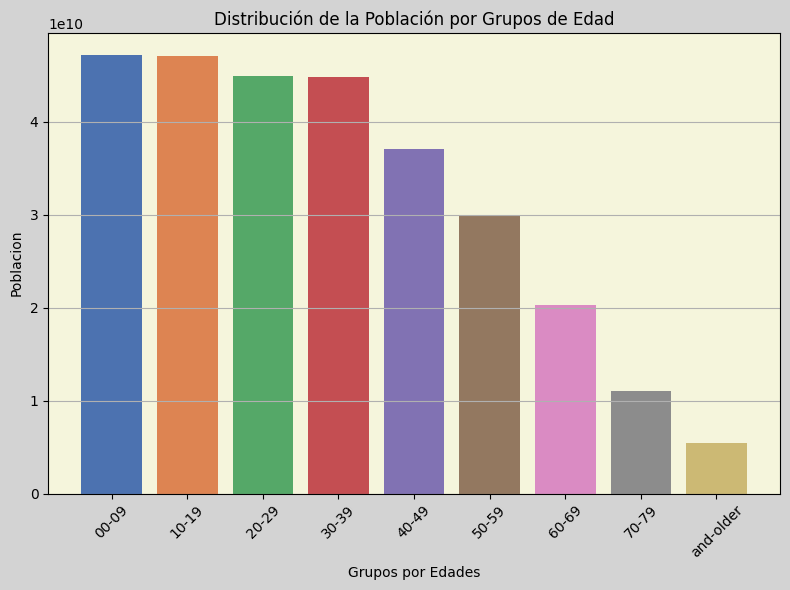

In [36]:
# Definir los nombres de las columnas de grupos de edad
grupos_de_edad = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29',
                  'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
                  'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']

# Calcular la suma de población por cada grupo de edad
suma_por_grupo_de_edad = data_latinoamerica_nuevo[grupos_de_edad].sum().sort_values(ascending=False)


# Definir una paleta de colores con Seaborn
palette = sns.color_palette('deep', len(suma_por_grupo_de_edad))

# Crear una figura y ejes
plt.figure(figsize=(8, 6))

# Crear el gráfico de barras apiladas
bars = plt.bar(suma_por_grupo_de_edad.index, suma_por_grupo_de_edad, color=palette)

# Establecer título y etiquetas de los ejes
plt.title('Distribución de la Población por Grupos de Edad')
plt.xlabel('Grupos por Edades')
plt.ylabel('Poblacion')

plt.gca().set_facecolor('beige')  # Color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')  # Establece el fondo alrededor del gráfico a gris 

plt.xticks(range(len(grupos_de_edad)), [col.split('_')[-2] + '-' + col.split('_')[-1] for col in grupos_de_edad], rotation=45, )
plt.grid(axis='y')  # Agregar rejilla solo en el eje y

# Mostrar el gráfico
plt.tight_layout()
plt.show()

##### **16-** Mapa de calor de Métricas por país.

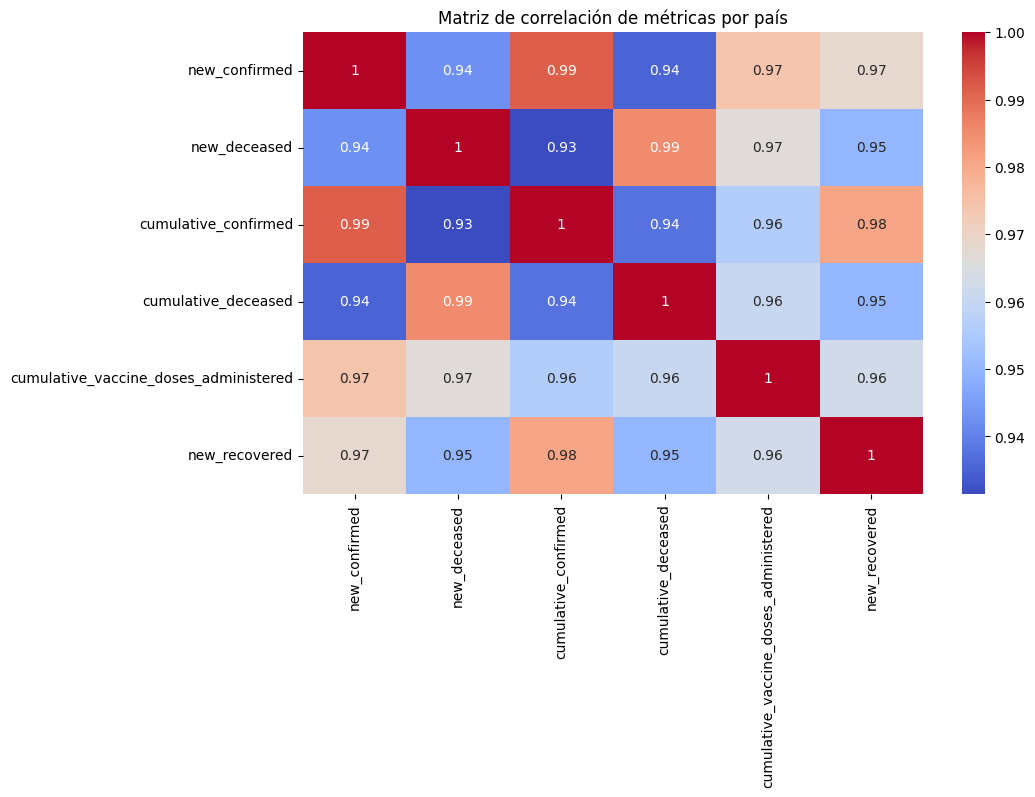

In [37]:
# Definir la lista de métricas
metricas = ['new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'new_recovered']

# Agrupar los datos por país y calcular la media de las métricas
metricas_por_pais = data_latinoamerica_nuevo.groupby('country_name')[metricas].mean()

# Calcular la matriz de correlación para las métricas agrupadas
matriz_de_correlacion = metricas_por_pais.corr()

# Configurar el tamaño de la figura para el mapa de calor
plt.figure(figsize=(10, 6))

# Crear el mapa de calor con la matriz de correlación y aplicar la máscara
sns.heatmap(matriz_de_correlacion, annot=True, cmap='coolwarm')


plt.title('Matriz de correlación de métricas por país')         # Añadir un título al gráfico
plt.gca().set_facecolor('beige')                                # Color de fondo del área del gráfico

plt.show()          # Mostrar el gráfico

##### **17-** Diagrama de barras apilado de comparación de la tasa de mortalidad masculina vs. femenina por país.

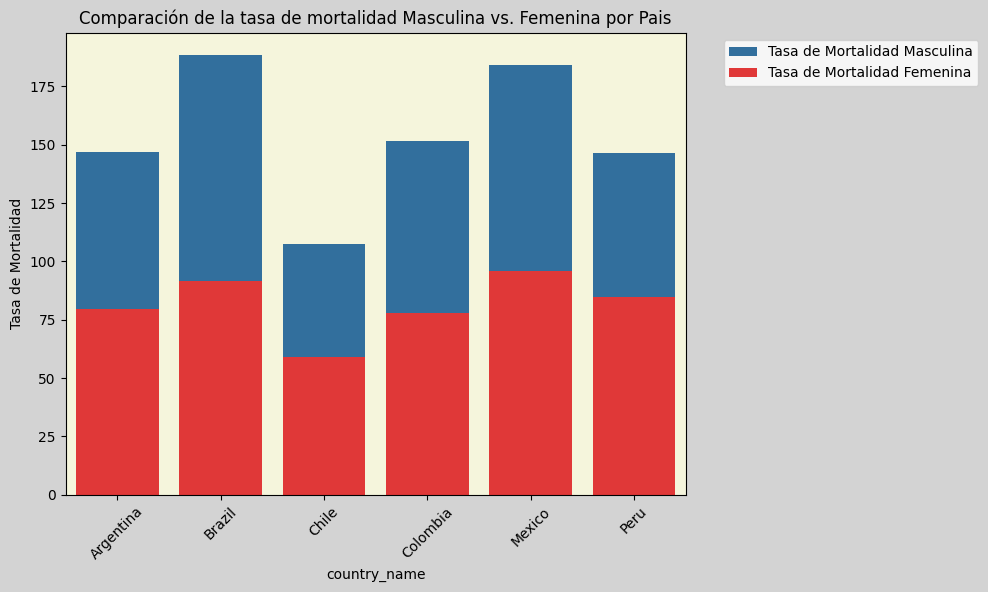

In [38]:

plt.figure(figsize=(8, 6))

sns.barplot(data=data_latinoamerica_nuevo, x='country_name', y='adult_male_mortality_rate', color='#2072AF', label='Tasa de Mortalidad Masculina')
            
sns.barplot(data=data_latinoamerica_nuevo, x='country_name', y='adult_female_mortality_rate', color='#FC1C1C', label='Tasa de Mortalidad Femenina')

plt.xticks(rotation=45)
plt. ylabel('Tasa de Mortalidad')
plt. title('Comparación de la tasa de mortalidad Masculina vs. Femenina por Pais')

plt.gca().set_facecolor('beige')  # Color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')  # Establece el fondo alrededor del gráfico a gris 

plt. legend(bbox_to_anchor=(1.05, 1), loc='upper left')


plt. show()

##### **18-** Matriz de correlación de indicadores demográficos y de salud.

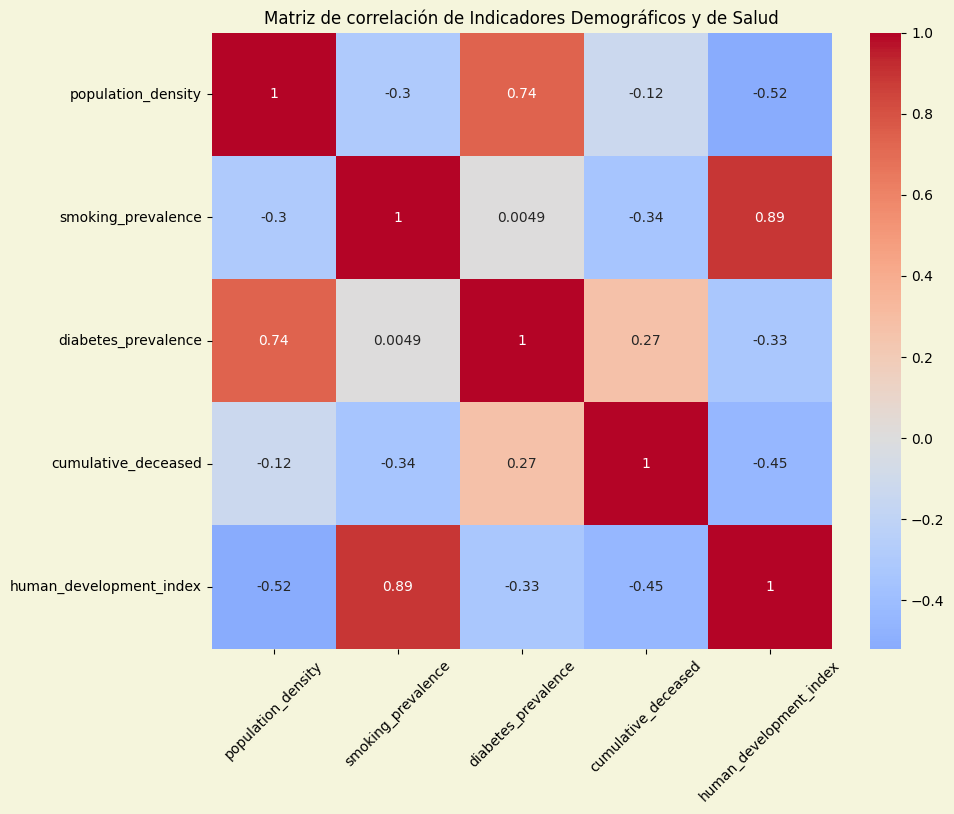

In [39]:
# Seleccionar las columnas de salud 
salud =['population_density', 'smoking_prevalence', 'diabetes_prevalence', 'cumulative_deceased', 'human_development_index']

matriz_correlacion = data_latinoamerica_nuevo[salud].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', center=0)
plt.xticks(rotation=45)  # Rotar las etiquetas 
plt.title('Matriz de correlación de Indicadores Demográficos y de Salud')
plt.gcf().set_facecolor('beige')  # Establece el fondo alrededor del gráfico

plt. show()

##### **19-** Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad.

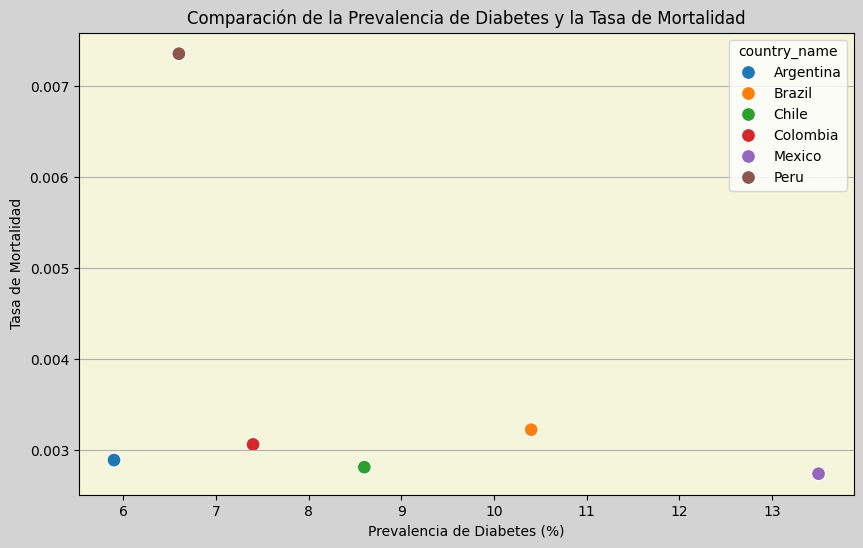

In [42]:
data_latinoamerica_nuevo['Tasa_de_Mortalidad'] = data_latinoamerica_nuevo['cumulative_deceased'] / data_latinoamerica_nuevo['population']

# Agrupar los datos por país y obtener el valor máximo de la tasa de mortalidad y la prevalencia de diabetes
data_agrupada = data_latinoamerica_nuevo.groupby('country_name').agg({
    'diabetes_prevalence': 'max',
    'Tasa_de_Mortalidad': 'max'
}).reset_index()

# Crear una figura y un eje para el gráfico con un tamaño específico
fig, ax = plt.subplots(figsize=(10, 6))

# Crear un gráfico de dispersión para comparar la prevalencia de diabetes y la tasa de mortalidad
sns.scatterplot(x='diabetes_prevalence', y='Tasa_de_Mortalidad', data=data_agrupada, hue='country_name', s=100)

# Añadir un título al gráfico
plt.title('Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad')

# Etiquetar el eje X
plt.xlabel('Prevalencia de Diabetes (%)')

# Etiquetar el eje Y
plt.ylabel('Tasa de Mortalidad')
plt.grid(axis='y')  # Agregar lineas solo en el eje y
plt.gca().set_facecolor('beige')  # Color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')  # Establece el fondo alrededor del gráfico 

# Mostrar el gráfico
plt.show()

## **Avance 3:** *EDA con Numpy y Pandas*

#### **IMPORTACION DE LIBRERIAS**

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

#### **CARGA DEL DATASET**

In [44]:
data_latinoamerica_nuevo = pd.read_csv('DatosFinalesFiltradoNuevo.csv', sep= ',')

Parseo de la columna 'Date' a fecha. y creo un indice para dicha columna

In [45]:
data_latinoamerica_nuevo['date'] = pd.to_datetime(data_latinoamerica_nuevo['date'])


data_latinoamerica_nuevo.set_index('date', inplace=True)      #mis fechas se convierten en un index

In [46]:
paises_filtrados = ['Argentina', 'Chile', 'Colombia', 'Mexico', 'Peru', 'Brazil'] 

#### **ANÁLISIS EXPLORATORIO DETALLADO, UTILIZANDO TÉCNICAS AVANZADAS DE PANDAS Y NUMPY**

##### **1-** Evolución de Casos Activos vs. Recuperados

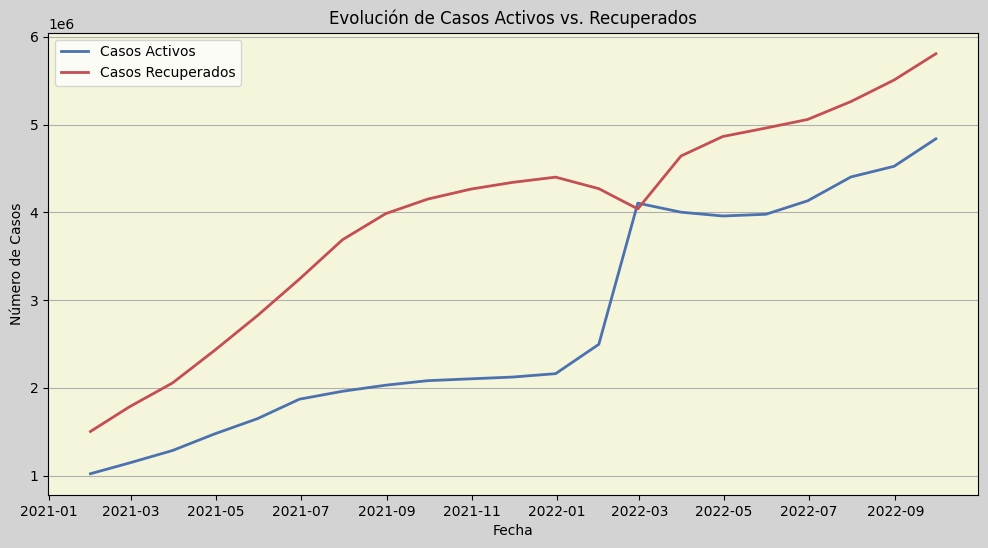

In [47]:
# Calcular los casos activos
data_latinoamerica_nuevo['active_cases'] = data_latinoamerica_nuevo['cumulative_confirmed'] - data_latinoamerica_nuevo['cumulative_recovered'] - data_latinoamerica_nuevo['cumulative_deceased']

# Resamplear los datos a una frecuencia mensual y calcular la media
datos_mensuales = data_latinoamerica_nuevo.resample('ME').mean(numeric_only=True)


plt.figure(figsize=(12, 6))     # Crear el gráfico de líneas
plt.plot(datos_mensuales.index, datos_mensuales['active_cases'], label='Casos Activos', linewidth=2, color='#4C71AF')
plt.plot(datos_mensuales.index, datos_mensuales['cumulative_recovered'], label='Casos Recuperados', linewidth=2, color='#C44E52')

# Configurar los títulos y etiquetas
plt.title('Evolución de Casos Activos vs. Recuperados')
plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.legend()

plt.gca().set_facecolor('beige')  # Color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')  # Establece el fondo alrededor del gráfico
plt.grid(axis='y')  # Agregar lineas solo en el eje y

plt.show()      # Mostrar el gráfico

##### **2-** Tasa de Crecimiento (%)

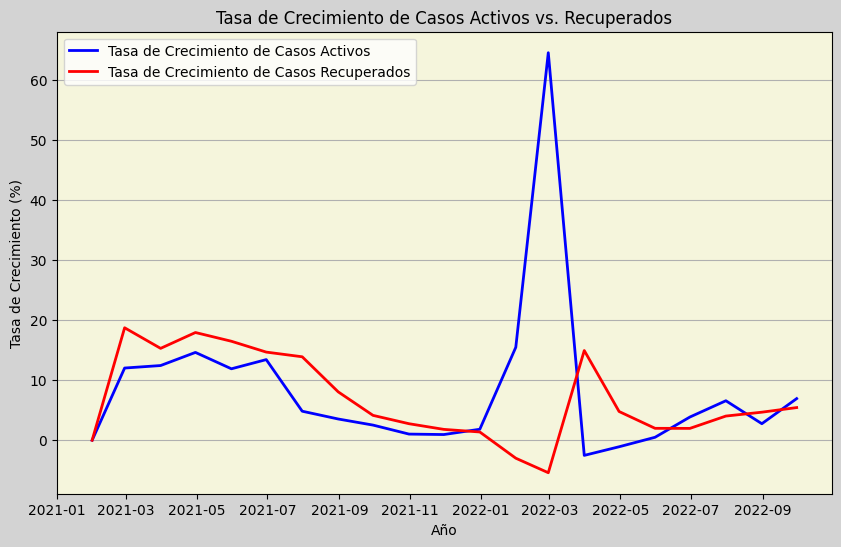

In [48]:
# Calcular la tasa de crecimiento en porcentaje
datos_mensuales['tasa_crecimiento_activos'] = ((datos_mensuales['active_cases'].diff() / datos_mensuales['active_cases'].shift()) * 100).fillna(0)
datos_mensuales['tasa_crecimiento_recuperados'] = ((datos_mensuales['cumulative_recovered'].diff() / datos_mensuales['cumulative_recovered'].shift()) * 100).fillna(0)

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(datos_mensuales.index, datos_mensuales['tasa_crecimiento_activos'], color='blue', label='Tasa de Crecimiento de Casos Activos', linewidth=2)
plt.plot(datos_mensuales.index, datos_mensuales['tasa_crecimiento_recuperados'], color='red', label='Tasa de Crecimiento de Casos Recuperados', linewidth=2)

# Configurar los títulos y etiquetas
plt.title('Tasa de Crecimiento de Casos Activos vs. Recuperados')
plt.xlabel('Año')
plt.ylabel('Tasa de Crecimiento (%)')
plt.legend()

plt.gca().set_facecolor('beige')  # Color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')  # Establece el fondo alrededor del gráfico
plt.grid(axis='y')  # Agregar lineas solo en el eje y

plt.show()  # Mostrar el gráfico

##### **3-** Relación entre la Cobertura de Vacunación y la Reducción de Casos

C:\Users\floor\AppData\Local\Temp\ipykernel_8288\4274632371.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_latinoamerica_nuevo.resample('M').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='blue',label='Casos Nuevos')
C:\Users\floor\AppData\Local\Temp\ipykernel_8288\4274632371.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_latinoamerica_nuevo.resample('M').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2, color='green', label='% Población Vacunada')


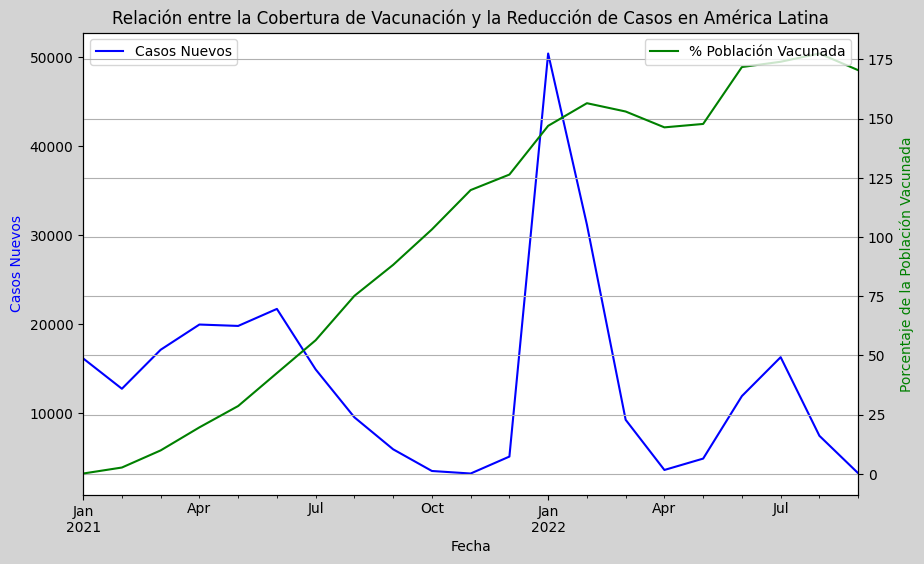

In [49]:
# Cómo evoluciona la vacunación en América Latina y la reducción de casos de COVID-19
plt.figure(figsize=(10, 6))  # Se crea una figura con un tamaño específico
ax1 = plt.gca()  # Se obtiene el eje actual (primario)
ax2 = ax1.twinx()  # Se crea un segundo eje y que comparte el mismo eje x con el primero

# Cálculo del porcentaje de la población vacunada
data_latinoamerica_nuevo['percentage_vaccinated'] = (data_latinoamerica_nuevo['cumulative_vaccine_doses_administered'] / data_latinoamerica_nuevo['population']) * 100

# Se grafican los nuevos casos de COVID-19 y el porcentaje de la población vacunada, resampleados por mes
data_latinoamerica_nuevo.resample('M').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='blue',label='Casos Nuevos')
data_latinoamerica_nuevo.resample('M').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2, color='green', label='% Población Vacunada')

# Configuración de las etiquetas del eje x y los ejes y
ax1.set_xlabel('Fecha')  # Etiqueta del eje x
ax1.set_ylabel('Casos Nuevos', color='blue')  # Etiqueta del eje y para los nuevos casos (color azul)
ax2.set_ylabel('Porcentaje de la Población Vacunada', color='green')  # Etiqueta del eje y para el porcentaje de vacunados (color verde)

# Título del gráfico
plt.title('Relación entre la Cobertura de Vacunación y la Reducción de Casos en América Latina')

# Leyendas para cada serie de datos en los ejes
ax1.legend(loc='upper left')  # Leyenda para los nuevos casos en la esquina superior izquierda
ax2.legend(loc='upper right')  # Leyenda para el porcentaje de vacunados en la esquina superior derecha

plt.gca().set_facecolor('beige')  # Color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')  # Establece el fondo alrededor del gráfico
plt.grid(axis='y')  # Agregar lineas solo en el eje y

# Mostrar el gráfico
plt.show()

##### **4-** Progreso de la vacunación por país

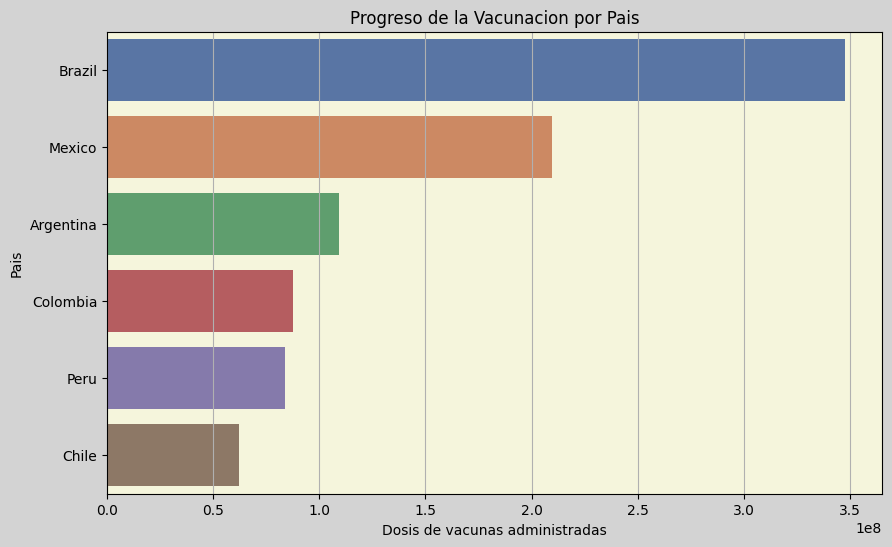

In [50]:
# Agrupar los datos por país y calcular el máximo de dosis de vacunas administradas para cada país

data_vacunacion = data_latinoamerica_nuevo.groupby('country_name') ['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)

plt.figure(figsize=(10, 6))         #crear la figura
sns.barplot(x=data_vacunacion.values, y=data_vacunacion.index,hue=data_vacunacion.index, palette='deep')    # Crear un gráfico de barras horizontal utilizando Seaborn
plt.xlabel('Dosis de vacunas administradas')        #titulo eje x
plt.ylabel('Pais')              #titulo eje y 
plt. title('Progreso de la Vacunacion por Pais')    #titulo del grafico
plt.gca().set_facecolor('beige')  # Color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')  # Establece el fondo alrededor del gráfico
plt.grid(axis='x')  # Agregar lineas solo en el eje x

plt. show()

##### **5-** Nuevos casos y temperatura promedio

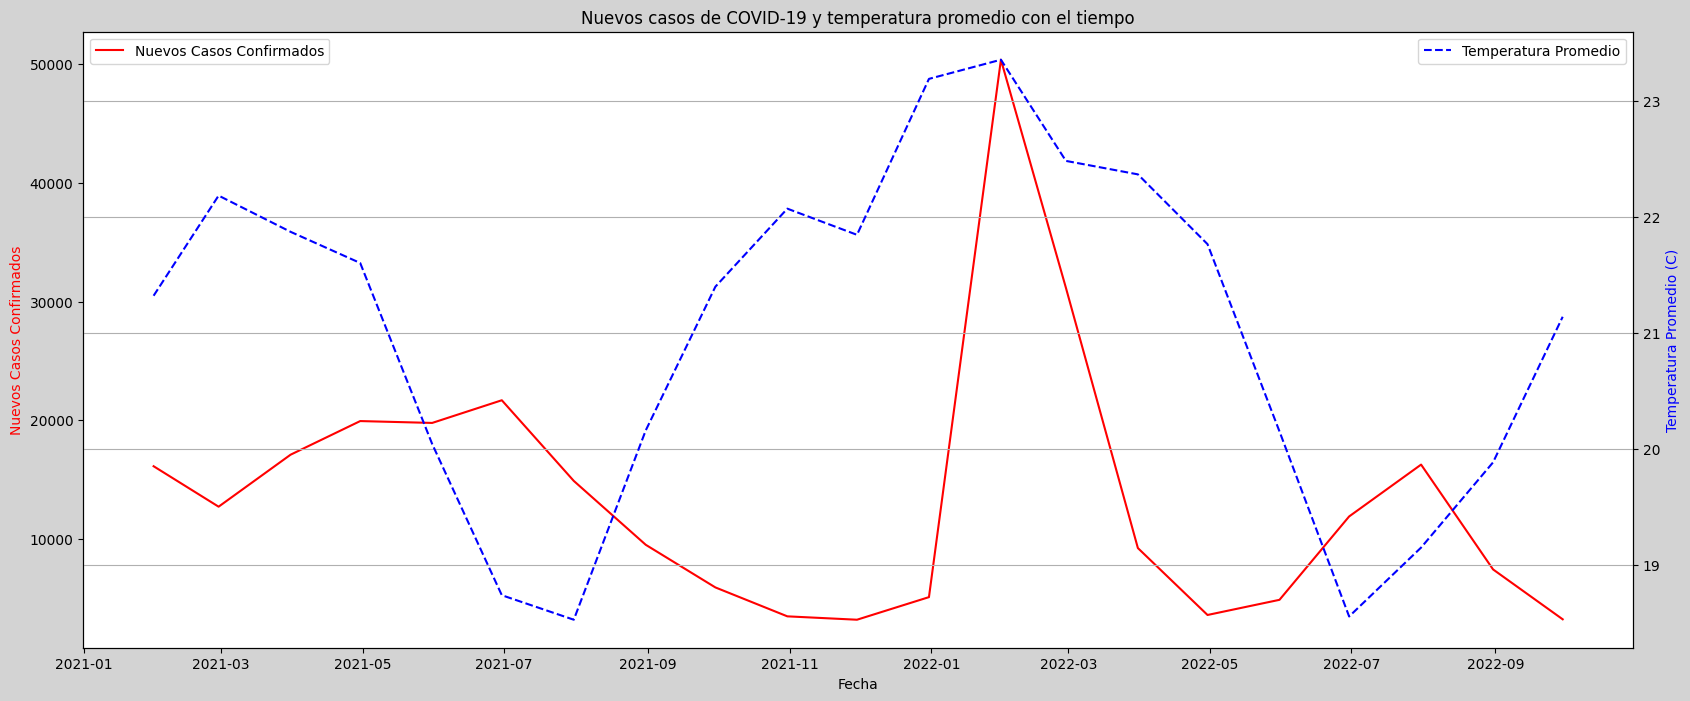

In [51]:
plt.figure(figsize=(20, 8))     #crea la figura
ax1 = plt.gca()                 #genera una grafica en el primer ax
ax2 = ax1.twinx()               #genera una segunda grafica que comparte el mismo eje x que ax1


# Graficar los datos de nuevos casos confirmados en el conjunto de ejes ax1
ax1.plot(data_latinoamerica_nuevo.resample('ME').mean(numeric_only=True).index, data_latinoamerica_nuevo.resample('ME').mean(numeric_only=True) ['new_confirmed'], color='red', label='Nuevos Casos Confirmados')

# Establecer la etiqueta del eje y para el segundo conjunto de ejes (temperatura promedio), con el texto en color azul
ax2.plot(data_latinoamerica_nuevo.resample('ME').mean(numeric_only=True).index, data_latinoamerica_nuevo.resample('ME').mean(numeric_only=True) ['average_temperature_celsius'], color='blue', label='Temperatura Promedio', linestyle='--')


ax1.set_xlabel('Fecha')
ax1.set_ylabel('Nuevos Casos Confirmados', color='red') #etiqueta de eje y linea de color rojo
ax2.set_ylabel('Temperatura Promedio (C)', color='blue') #etiqueta de eje y linea de color azul
plt.title('Nuevos casos de COVID-19 y temperatura promedio con el tiempo')  #titulo del grafico
ax1. legend(loc='upper left')   # Mostrar la leyenda para el primer conjunto de ejes en la esquina superior izquierda
ax2. legend(loc='upper right')  # # Mostrar la leyenda para el segundo conjunto de ejes en la esquina superior derecha

plt.gca().set_facecolor('beige')  # Color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')  # Establece el fondo alrededor del gráfico
plt.grid(axis='y')  # Agregar lineas solo en el eje y

plt.show()

##### **6-** Impacto de la Urbanización en la Propagación del Covid-19

C:\Users\floor\AppData\Local\Temp\ipykernel_8288\2367335532.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=casos_urbanos['urban_population_percentage'], y=casos_urbanos.index, palette='deep')


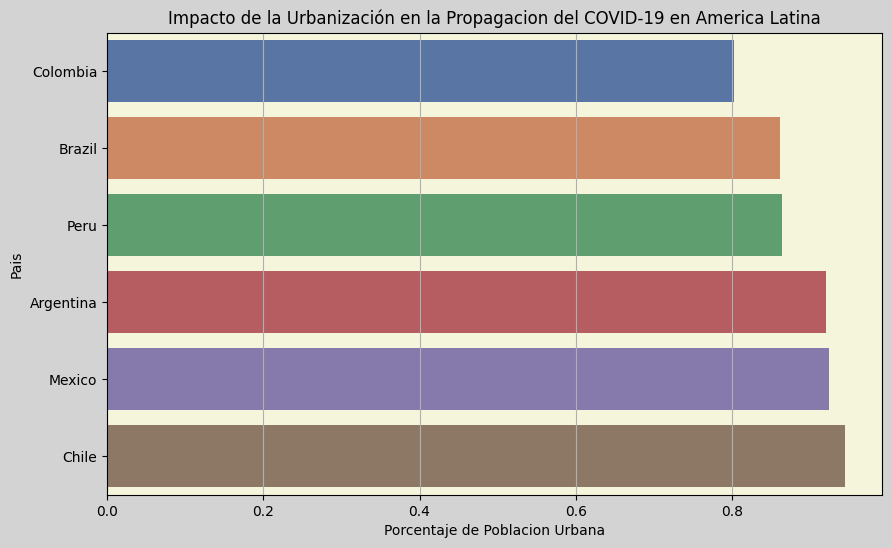

In [52]:
# Calcula el porcentaje de población urbana para cada país, el total de poblacion urbana dividido la poblacion
data_latinoamerica_nuevo['urban_population_percentage'] = data_latinoamerica_nuevo['population_urban'] / data_latinoamerica_nuevo['population']

# Agrupa los datos por país y selecciona el último registro de cada país, que contiene los datos más recientes
casos_urbanos = data_latinoamerica_nuevo.groupby('country_name').last().sort_values(by='urban_population_percentage')

plt.figure(figsize=(10, 6))     #crear la figura

# Crea un gráfico de barras utilizando Seaborn, donde x representa el porcentaje de población urbana y y representa el país
sns.barplot(x=casos_urbanos['urban_population_percentage'], y=casos_urbanos.index, palette='deep')
plt.xlabel('Porcentaje de Poblacion Urbana')
plt.ylabel('Pais')
plt.title('Impacto de la Urbanización en la Propagacion del COVID-19 en America Latina')
plt.gca().set_facecolor('beige')  # Color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')  # Establece el fondo alrededor del gráfico
plt.grid(axis='x')  # Agregar lineas solo en el eje y
plt.show()

##### **7-** Evolución Semanal de Casos Nuevos

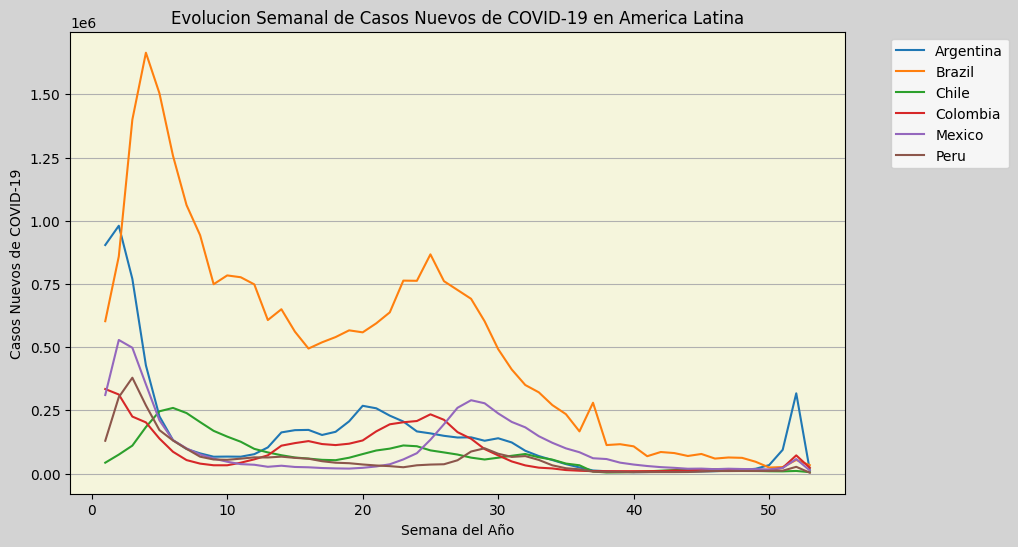

In [53]:
#Evolucion de casos de COVID-19 en America Latina a lo largo del tiempo por semana

# Añadir columnas 'week' usando el índice de fecha

data_latinoamerica_nuevo['week'] = data_latinoamerica_nuevo.index.isocalendar().week


# Agrupar los datos por 'country_name' y 'week' y sumar los casos nuevos confirmados para cada semana
casos_semanales = data_latinoamerica_nuevo.groupby(['country_name', 'week']) ['new_confirmed'].sum().reset_index()      

plt.figure(figsize=(10, 6))         # Crear una figura para el gráfico de tamaño

for country in casos_semanales['country_name'].unique():        # Iterar sobre cada país único en el conjunto de datos agrupados
    casos_semanales_por_pais = casos_semanales[casos_semanales['country_name'] == country]      # Filtrar los datos para el país actual
    plt.plot(casos_semanales_por_pais['week'], casos_semanales_por_pais['new_confirmed'], label=country)     # Graficar los casos nuevos confirmados por semana por pais
    
plt.xlabel('Semana del Año')        #añadir titulo eje x
plt.ylabel('Casos Nuevos de COVID-19')  #añadir titulo eje y
plt.title('Evolucion Semanal de Casos Nuevos de COVID-19 en America Latina')    #añadir titulo al grafico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')          # Añadir la leyenda fuera del gráfico, a la derecha
plt.gca().set_facecolor('beige')  # Color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')  # Establece el fondo alrededor del gráfico
plt.grid(axis='y')  # Agregar lineas solo en el eje y
plt.show()            # Mostrar el gráfico                                      

##### **8-** Evolución Anual de Casos Nuevos

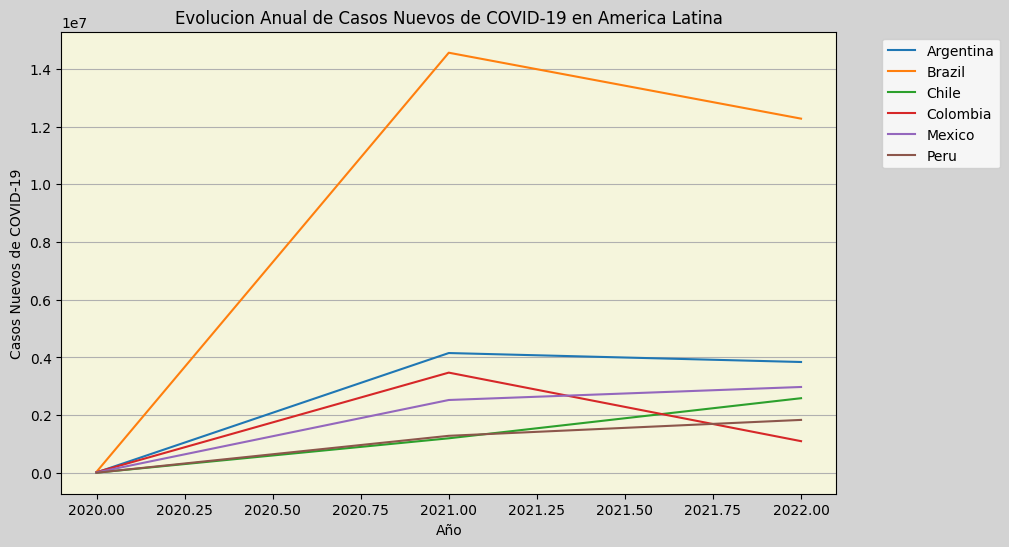

In [54]:
# Añadir columnas 'year' usando el índice de fecha
data_latinoamerica_nuevo['year'] = data_latinoamerica_nuevo.index.isocalendar().year

# Agrupar los datos por 'country_name' y 'year' y sumar los casos nuevos confirmados para cada semana
casos_anuales = data_latinoamerica_nuevo.groupby(['country_name', 'year']) ['new_confirmed']. sum().reset_index()

plt.figure(figsize=(10, 6))
for country in casos_anuales['country_name'].unique():      # Iterar sobre cada país único en el conjunto de datos agrupados
    casos_anuales_por_pais = casos_anuales [casos_anuales['country_name'] == country]       # Filtrar los datos para el país actual
    plt.plot(casos_anuales_por_pais['year'], casos_anuales_por_pais['new_confirmed'], label=country)    # Graficar los casos nuevos confirmados por año por pais

plt.ylabel('Casos Nuevos de COVID-19')  #añadir titulo eje y
plt.xlabel('Año')   #añadir titulo eje x
plt.title('Evolucion Anual de Casos Nuevos de COVID-19 en America Latina')  #agregar titulo al grafico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')       # Añadir la leyenda fuera del gráfico, a la derecha
plt.gca().set_facecolor('beige')  # Color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')  # Establece el fondo alrededor del gráfico
plt.grid(axis='y')  # Agregar lineas solo en el eje y
plt.show()      #imprimir el grafico

##### **9-** Distribución de la Población por Edad en Países

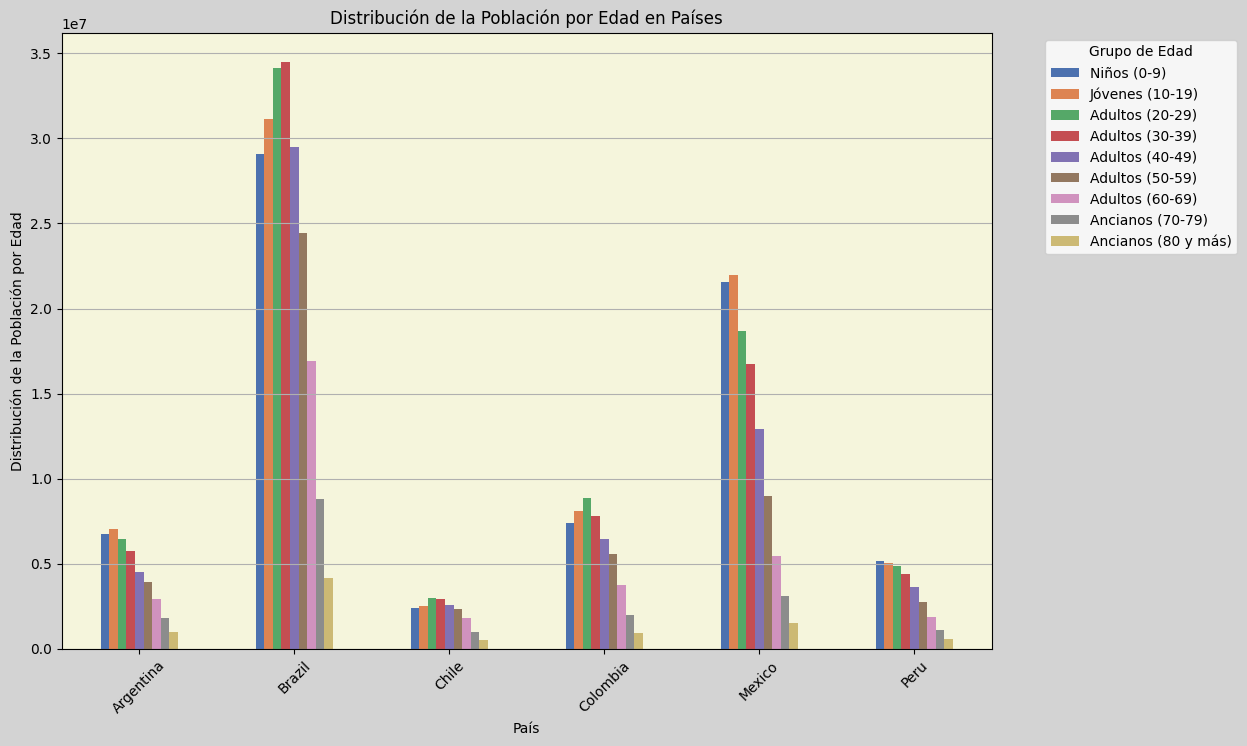

In [55]:
# Definir los grupos de edad
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']

age_distribution= data_latinoamerica_nuevo.groupby('country_name')[age_groups].mean()

# Crear el gráfico de barras
age_distribution.plot(kind='bar', stacked=False, figsize=(12, 8), color=('#4C71AF', '#DD8452', '#55A868', '#C44E52', '#8172B3', '#937860', '#D092BE', '#8C8C8C', '#CCB974'))

# Etiquetas y título
plt.xlabel('País')
plt.ylabel('Distribución de la Población por Edad')
plt.title('Distribución de la Población por Edad en Países')

# Leyenda

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Grupo de Edad', labels=['Niños (0-9)', 'Jóvenes (10-19)', 'Adultos (20-29)', 'Adultos (30-39)', 'Adultos (40-49)', 'Adultos (50-59)', 'Adultos (60-69)', 'Ancianos (70-79)', 'Ancianos (80 y más)'])
plt.gca().set_facecolor('beige')  # Color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')  # Establece el fondo alrededor del gráfico
plt.grid(axis='y')  # Agregar lineas solo en el eje y
plt.xticks(rotation=45)
# Mostrar el gráfico
plt.show()

##### **10-** Comparación de Estrategias de Vacunación en América Latina

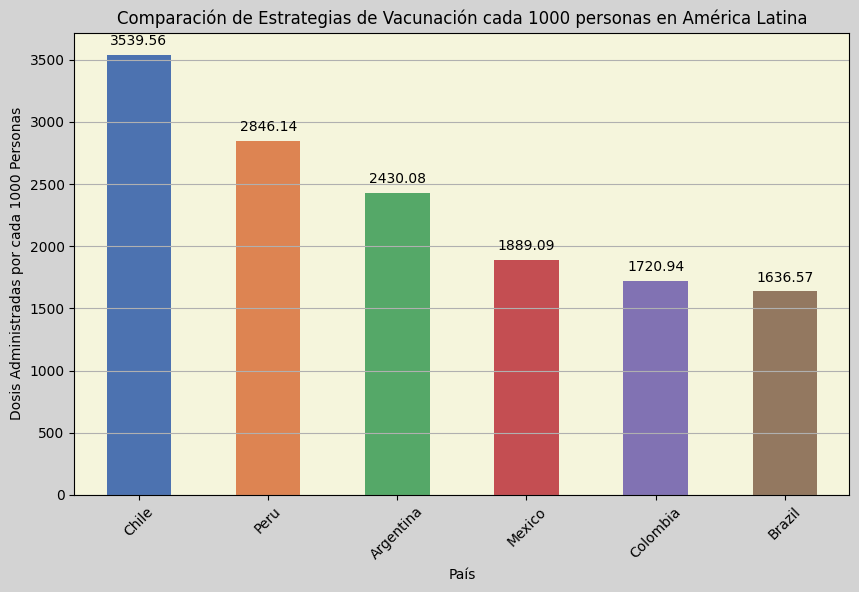

In [56]:
# Calcula el porcentaje de dosis de vacunas administradas por cada 1000 personas en cada país
vaccination_strategy = data_latinoamerica_nuevo.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_latinoamerica_nuevo.groupby('country_name')['population'].max() * 1000

# Ordena los países de forma descendente según el porcentaje de dosis administradas por cada 1000 personas
vaccination_strategy_sorted = vaccination_strategy.sort_values(ascending=False)

# Definir una paleta de colores con Seaborn
palette = sns.color_palette('deep', len(vaccination_strategy_sorted))

# Crea un gráfico de barras con el porcentaje de dosis administradas por cada 1000 personas para cada país
ax = vaccination_strategy_sorted.plot(kind='bar', figsize=(10, 6), color=palette)

plt.xlabel('País')  # Etiqueta del eje x
plt.ylabel('Dosis Administradas por cada 1000 Personas')  # Etiqueta del eje y
plt.title('Comparación de Estrategias de Vacunación cada 1000 personas en América Latina')  # Título del gráfico

plt.gca().set_facecolor('beige')  # Color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')  # Establece el fondo alrededor del gráfico
plt.grid(axis='y')  # Agregar líneas solo en el eje y
plt.xticks(rotation=45)

# Agregar la tasa de dosis administradas encima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()  # Muestra el gráfico de barras

##### **11-** Evolución del Número de Muertes Diarias

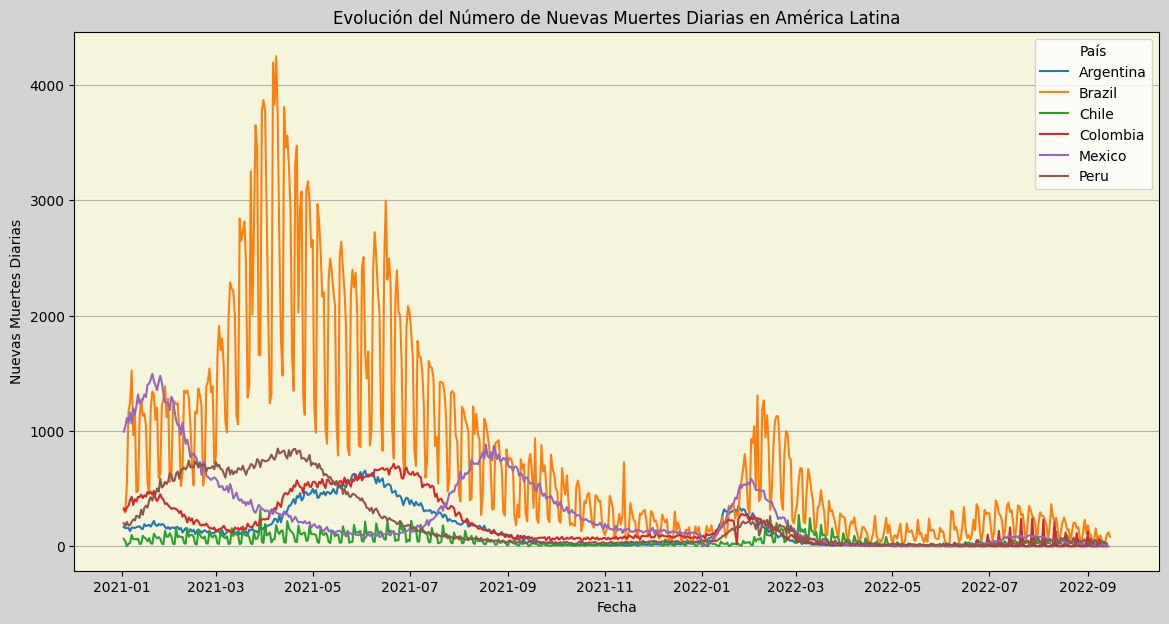

In [57]:
# Crear un gráfico de línea para la evolución del número de nuevas muertes diarias en los países de América Latina
plt.figure(figsize=(14, 7))  # Configura el tamaño de la figura del gráfico

# Definir una paleta de colores con Seaborn
palette = sns.color_palette('deep')

sns.lineplot(
    data=data_latinoamerica_nuevo,  # Especifica el DataFrame a utilizar
    x='date',  # Especifica la columna para el eje X
    y='new_deceased',  # Especifica la columna para el eje Y
    hue='country_name',  # Diferencia las líneas por país
    color=palette)


# Configurar los ejes y el título del gráfico
plt.xlabel('Fecha')  # Etiqueta para el eje X
plt.ylabel('Nuevas Muertes Diarias')  # Etiqueta para el eje Y
plt.title('Evolución del Número de Nuevas Muertes Diarias en América Latina')  # Título del gráfico
plt.legend(title='País')  # Título de la leyenda
plt.gca().set_facecolor('beige')  # Color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')  # Establece el fondo alrededor del gráfico
plt.grid(axis='y')  # Agregar líneas solo en el eje y

plt.show()  # Muestra el gráfico 

##### **12-** Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad

C:\Users\floor\AppData\Local\Temp\ipykernel_8288\1793403461.py:12: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.barplot(data=conditions_data, x='country_name', y='diabetes_prevalence', hue='country_name',  palette=palette)


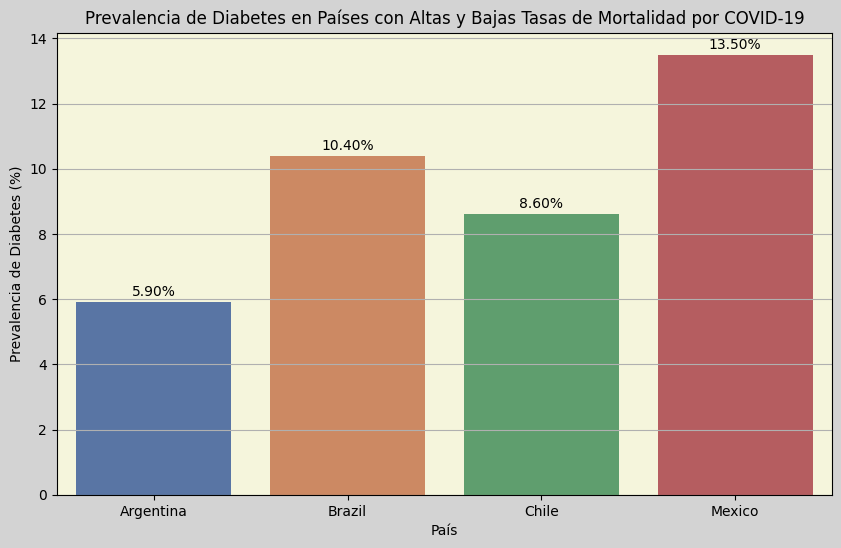

In [58]:
# Obtener los países con las mayores y menores tasas de mortalidad acumulada
top_countries = data_latinoamerica_nuevo.groupby('country_name')['cumulative_deceased'].max().nlargest(2).index
bottom_countries = data_latinoamerica_nuevo.groupby('country_name')['cumulative_deceased'].max().nsmallest(2).index


# Filtrar los datos para incluir solo los países en las listas de mayores y menores tasas de mortalidad
conditions_data = data_latinoamerica_nuevo[data_latinoamerica_nuevo['country_name'].isin(top_countries.union(bottom_countries))]


# Prevalencia de diabetes
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura para el gráfico
ax = sns.barplot(data=conditions_data, x='country_name', y='diabetes_prevalence', hue='country_name',  palette=palette)


plt.xlabel('País')          # Etiqueta para el eje X
plt.ylabel('Prevalencia de Diabetes (%)')   # Etiqueta para el eje Y
plt.title('Prevalencia de Diabetes en Países con Altas y Bajas Tasas de Mortalidad por COVID-19')  # Título del gráfico
plt.gca().set_facecolor('beige')  # Color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')  # Establece el fondo alrededor del gráfico
plt.grid(axis='y')  # Agregar líneas solo en el eje y


# Agregar el valor de prevalencia de diabetes encima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{height:.2f}%', ha='center', va='bottom')

# Mostrar el gráfico
plt.show()


- Prevalencia de Fumadores en Países con Altas y Bajas Tasas de Mortalidad

C:\Users\floor\AppData\Local\Temp\ipykernel_8288\2070679418.py:3: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.barplot(data=conditions_data, x='country_name', y='smoking_prevalence', hue='country_name', palette=palette)


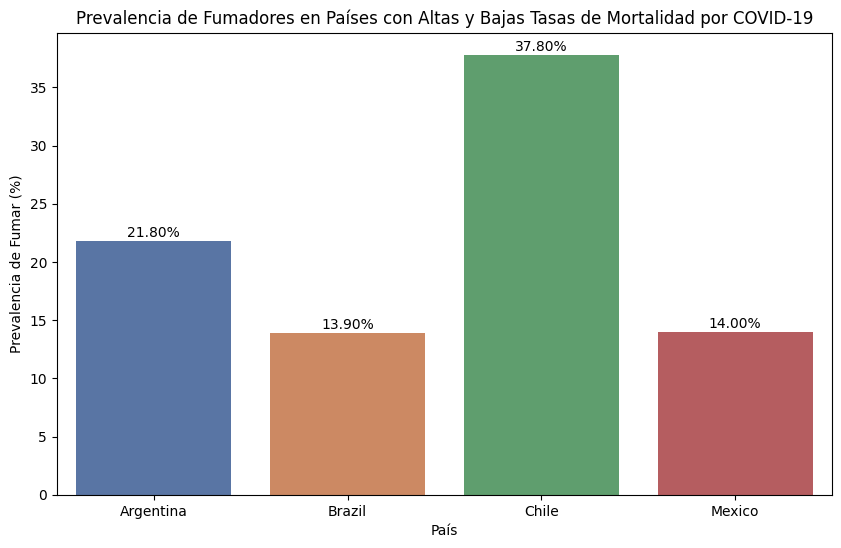

In [59]:
# Prevalencia de fumar
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura para el gráfico
ax = sns.barplot(data=conditions_data, x='country_name', y='smoking_prevalence', hue='country_name', palette=palette)


plt.xlabel('País')              # Etiqueta para el eje X
plt.ylabel('Prevalencia de Fumar (%)')              # Etiqueta para el eje Y
plt.title('Prevalencia de Fumadores en Países con Altas y Bajas Tasas de Mortalidad por COVID-19')          # Título del gráfico

# Agregar el valor de prevalencia de fumar encima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{height:.2f}%', ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

##### **13-** Variación Mensual de Casos y Muertes

C:\Users\floor\AppData\Local\Temp\ipykernel_8288\3680074087.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  nuevos_casos_por_mes = data_latinoamerica_nuevo['new_confirmed'].resample('M').sum()
C:\Users\floor\AppData\Local\Temp\ipykernel_8288\3680074087.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  nuevos_fallecidos_por_mes = data_latinoamerica_nuevo['new_deceased'].resample('M').sum()


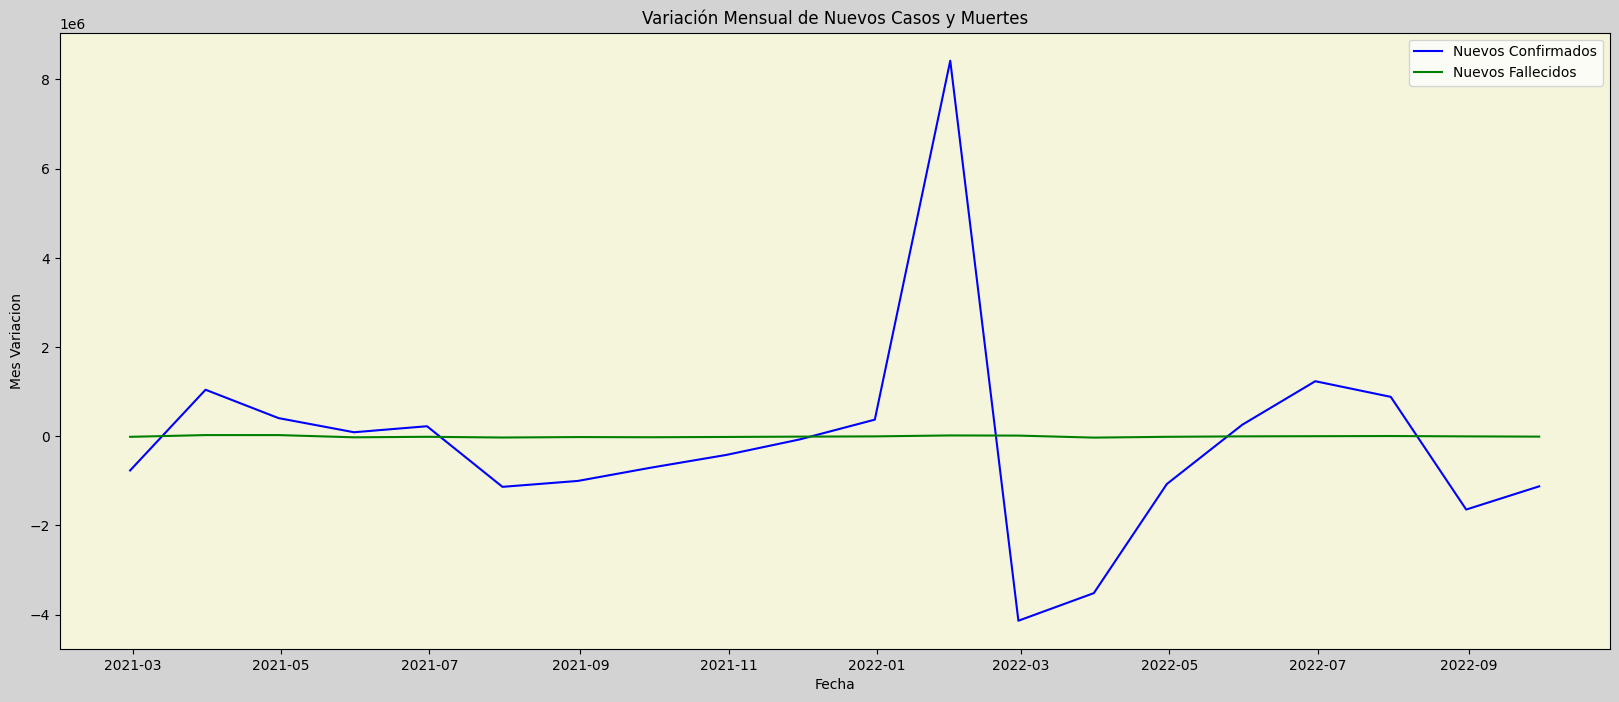

In [60]:
# Hacer un resampleo para calcular la suma mensual de nuevos casos confirmados y nuevas muertes

nuevos_casos_por_mes = data_latinoamerica_nuevo['new_confirmed'].resample('M').sum()
nuevos_fallecidos_por_mes = data_latinoamerica_nuevo['new_deceased'].resample('M').sum()

#calcula la variación mensual restando la suma del mes anterior a la suma del mes actual
variacion_nuevos_casos = nuevos_casos_por_mes.diff()
variacion_nuevos_fallecidos = nuevos_fallecidos_por_mes.diff()

# crear el grafico 

plt.figure(figsize=(20, 8))
sns.lineplot(x=variacion_nuevos_casos.index, y=variacion_nuevos_casos.values, label='Nuevos Confirmados', color='blue')
sns.lineplot(x=variacion_nuevos_fallecidos.index, y=variacion_nuevos_fallecidos.values, label='Nuevos Fallecidos', color='green')

# personalizar el grafico 

plt.xlabel('Fecha')
plt.ylabel('Mes Variacion')
plt.title('Variación Mensual de Nuevos Casos y Muertes')

plt.gca().set_facecolor('beige')  # Color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')  # Establece el fondo alrededor del gráfico
plt.legend()
plt.show()


##### **Tasa de Letalidad por País**

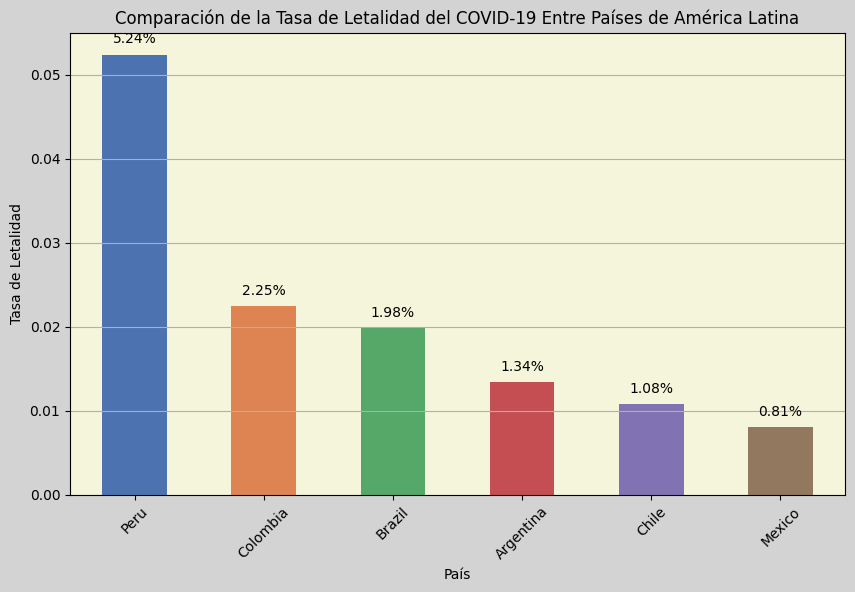

In [61]:
# Calcula la tasa de letalidad por país
data_latinoamerica_nuevo['case_fatality_rate'] = data_latinoamerica_nuevo['cumulative_deceased'] / data_latinoamerica_nuevo['cumulative_confirmed']

# Agrupa los datos por país y obtiene la última tasa de letalidad registrada para cada país, luego ordena estos valores
fatality_rates = data_latinoamerica_nuevo.groupby('country_name')['case_fatality_rate'].last().sort_values(ascending=False)
# Definir una paleta de colores con Seaborn
palette = sns.color_palette('deep')

# Crear la figura del gráfico
plt.figure(figsize=(10, 6))  # Configura el tamaño de la figura para el gráfico

# Crear el gráfico de barras utilizando la paleta de colores
bars = fatality_rates.plot(kind='bar', color=palette)

# Configurar los ejes y el título del gráfico
plt.xlabel('País')  # Etiqueta para el eje X
plt.ylabel('Tasa de Letalidad')  # Etiqueta para el eje Y
plt.title('Comparación de la Tasa de Letalidad del COVID-19 Entre Países de América Latina')  # Título del gráfico

plt.gca().set_facecolor('beige')  # Color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')  # Establece el fondo alrededor del gráfico
plt.grid(axis='y')  # Agregar líneas solo en el eje y
plt.xticks(rotation=45)
# Agregar el valor de la tasa de letalidad encima de cada barra
for p in bars.patches:
    height = p.get_height()
    bars.text(p.get_x() + p.get_width() / 2., height + 0.001, f'{height:.2%}', ha='center', va='bottom')

# Mostrar el gráfico
plt.show()  # Muestra el gráfico en pantalla

##### **14-** Análisis Temporal de la Mortalidad

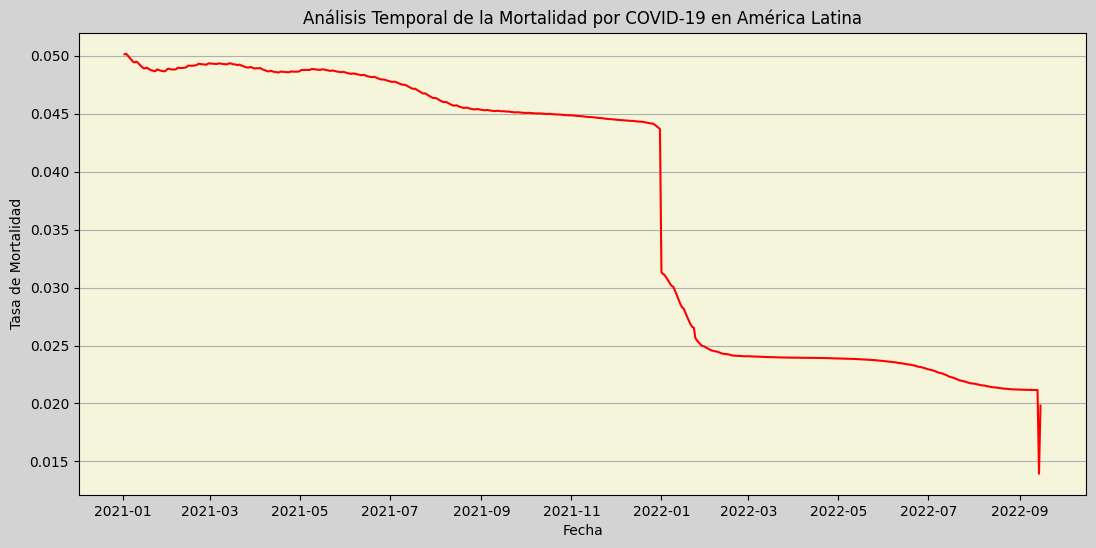

In [62]:
# Cálculo de la tasa de mortalidad como el cociente entre el número acumulado de fallecidos y el número acumulado de confirmados de COVID-19
data_latinoamerica_nuevo['mortality_rate'] = data_latinoamerica_nuevo['cumulative_deceased'] / data_latinoamerica_nuevo['cumulative_confirmed']

plt.figure(figsize=(13, 6))         # Creación de una figura para el gráfico con un tamaño específico

# Gráfico de línea que muestra el análisis temporal de la tasa de mortalidad por COVID-19 en América Latina
# Se utiliza Seaborn para generar el gráfico, con la fecha en el eje x y la tasa de mortalidad en el eje y,
# utilizando el valor medio como estimador y sin intervalo de confianza (ci=None)
sns.lineplot(data=data_latinoamerica_nuevo, x='date', y='mortality_rate', estimator='mean', errorbar=None, color='red')


plt.title('Análisis Temporal de la Mortalidad por COVID-19 en América Latina')      # Título del gráfico
plt.xlabel('Fecha')     # Etiqueta del eje x
plt.ylabel('Tasa de Mortalidad')    # Etiqueta del eje y

plt.gca().set_facecolor('beige')  # Color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')  # Establece el fondo alrededor del gráfico
plt.grid(axis='y')  # Agregar lineas solo en el eje y

plt.show()      # Mostrar el gráfico

##### **15-** Comparación de la Situación Actual (Contexto de los datos)

<Figure size 600x400 with 0 Axes>

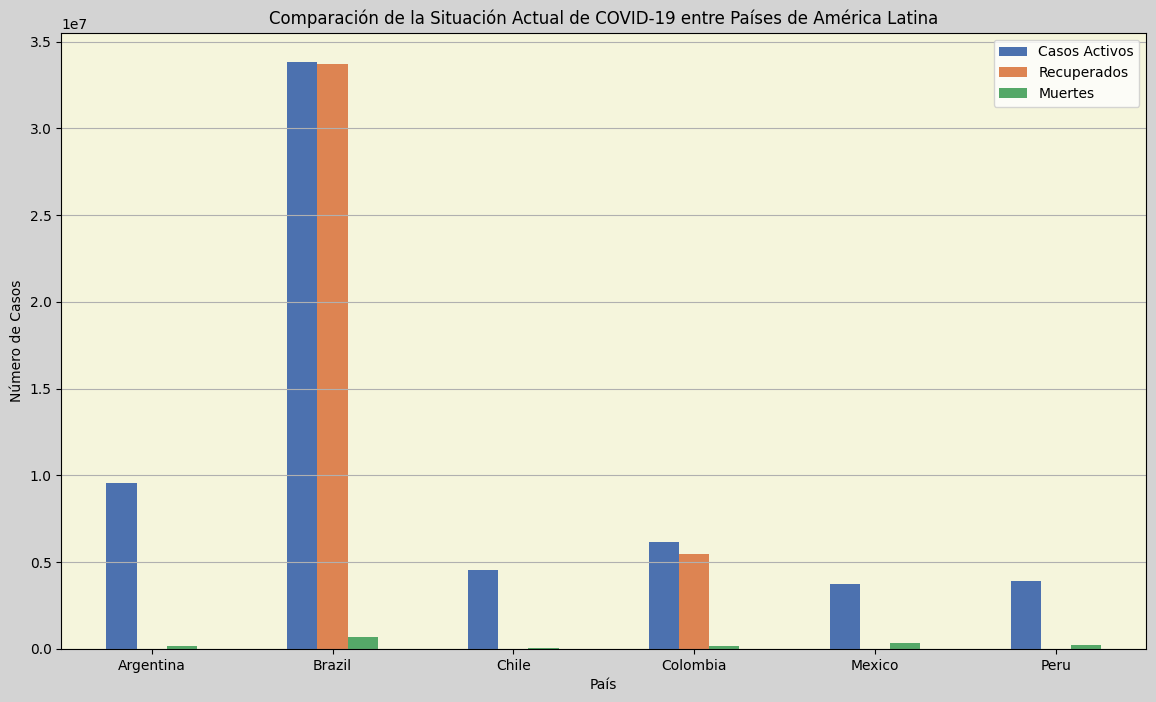

In [63]:
# No hay datos de recuperados y muertes en algunos países

# Agrupa los datos por nombre del país y obtiene el valor máximo para 'active_cases', 'cumulative_recovered' y 'cumulative_deceased'
situacion_actual = data_latinoamerica_nuevo.groupby('country_name').max()[['active_cases', 'cumulative_recovered', 'cumulative_deceased']]

# Crea el gráfico de barras
plt.figure(figsize=(6, 4))  # Configura el tamaño de la figura del gráfico
situacion_actual.plot(kind='bar', stacked=False, figsize=(14, 8), color=('#4C71AF', '#DD8452', '#55A868'))  # Grafica los datos en un gráfico de barras no apiladas

# Configura el título y etiquetas del gráfico
plt.title('Comparación de la Situación Actual de COVID-19 entre Países de América Latina')  # Título del gráfico
plt.xlabel('País')  # Etiqueta del eje X
plt.ylabel('Número de Casos')  # Etiqueta del eje Y
plt.legend(['Casos Activos', 'Recuperados', 'Muertes'])  # Leyenda para cada barra
plt.gca().set_facecolor('beige')  # Color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')  # Establece el fondo alrededor del gráfico
plt.grid(axis='y')  # Agregar líneas solo en el eje y
plt.xticks(rotation=0)
plt.show()  # Muestra el gráfico en pantalla

##### Mapa de distribución de casos confirmados, muertes, vacunas y recuperados

In [64]:
import folium
from folium.plugins import HeatMap

# Seleccionamos las columnas que vamos a utilizar
columns = ['latitude', 'longitude', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'cumulative_recovered']
data_map = data_latinoamerica_nuevo[columns].dropna()               #Elimina las filas que contienen valores faltantes, en cualquier columna del dataframe

# Creamos un mapa centrado en América Latina
mapa = folium.Map(location=[-14.235004, -51.92528], zoom_start=3)

# Creamos una función para agregar mapas de calor con capas de control
def add_heatmap(data, value_column, name, map_object):
    heat_data = data[['latitude', 'longitude', value_column]].dropna().values
    heat_map = HeatMap(data=heat_data, radius=15)
    heat_layer = folium.FeatureGroup(name=name)
    heat_layer.add_child(heat_map)
    map_object.add_child(heat_layer)

# Añadimos los mapas de calor al mapa principal con capas de control
add_heatmap(data_map, 'cumulative_confirmed', 'Casos Confirmados', mapa)
add_heatmap(data_map, 'cumulative_deceased', 'Muertes', mapa)
add_heatmap(data_map, 'cumulative_vaccine_doses_administered', 'Vacunas Administradas', mapa)
add_heatmap(data_map, 'cumulative_recovered', 'Recuperados', mapa)

# Añadimos la capa de control para activar/desactivar los mapas de calor
folium.LayerControl().add_to(mapa)

# Guardamos el mapa en un archivo HTML
mapa.save('mapa.html')

# Si estás en un Jupyter Notebook, puedes visualizar el mapa directamente:
mapa

##### Análisis mas detallado

No se ve muy detallado en las anteriores graficas, por lo tanto vamos a realizar un analisis mas detallado de las dosis administradas, casos confirmados, muertes y recuperados en cada pais pero graficos mas basicos manteniendo los mapas

In [65]:
world = gpd. read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

C:\Users\floor\AppData\Local\Temp\ipykernel_8288\1484611064.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd. read_file(gpd.datasets.get_path('naturalearth_lowres'))


pop_est      continent                      name iso_a3  gdp_md_est  \
0       889953.0        Oceania                      Fiji    FJI        5496   
1     58005463.0         Africa                  Tanzania    TZA       63177   
2       603253.0         Africa                 W. Sahara    ESH         907   
3     37589262.0  North America                    Canada    CAN     1736425   
4    328239523.0  North America  United States of America    USA    21433226   
..           ...            ...                       ...    ...         ...   
172    6944975.0         Europe                    Serbia    SRB       51475   
173     622137.0         Europe                Montenegro    MNE        5542   
174    1794248.0         Europe                    Kosovo    -99        7926   
175    1394973.0  North America       Trinidad and Tobago    TTO       24269   
176   11062113.0         Africa                  S. Sudan    SSD       11998   

                                              geometry  
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
..                                                 ...  
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...  
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...  
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...  
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...  

[177 rows x 6 columns]

C:\Users\floor\AppData\Local\Temp\ipykernel_8288\3782113525.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


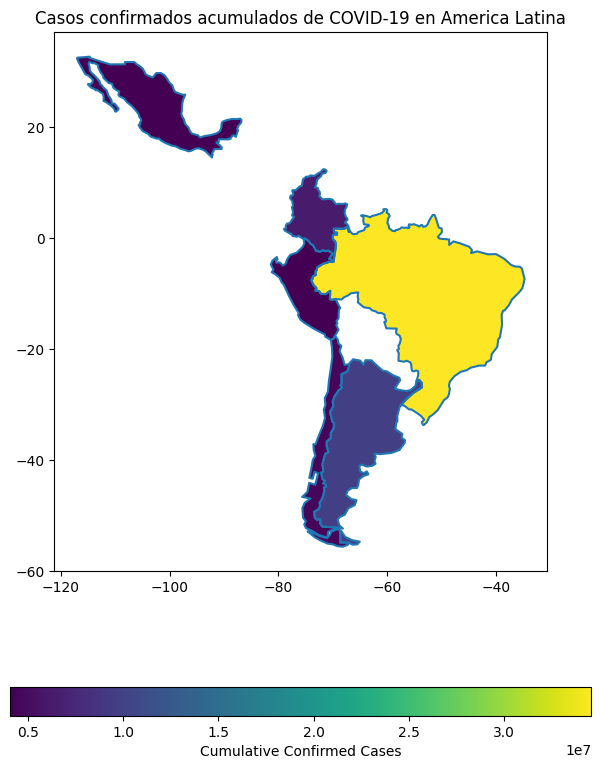

In [66]:
# mapa para ver la distribución de casos confirmados en latinoamerica por pais

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name != "Antarctica")]
world = world[(world.name == "Argentina") | (world.name == "Chile") | (world.name == "Colombia") | (world.name == "Mexico") | (world.name == "Peru") | (world.name == "Brazil")]
world = world. rename(columns={"name":"country_name"})
world = world.merge(data_latinoamerica_nuevo.groupby('country_name') ['cumulative_confirmed'].max().reset_index(), on="country_name")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world. boundary.plot(ax=ax)
world.plot(column='cumulative_confirmed', ax=ax, legend=True, legend_kwds={'label': "Cumulative Confirmed Cases", 'orientation': "horizontal", 'shrink': 0.5 })
plt. title('Casos confirmados acumulados de COVID-19 en America Latina')
plt. show()